In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataHP = pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

In [4]:
### Extraemos columnas con NAN

In [5]:
dataHP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
dataHP['Alley'].isnull().sum()

1369

In [7]:
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
dataHP['Alley'].isnull().mean()

0.9376712328767123

In [9]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [10]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [11]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [12]:
### Complete case analysis (CCA)
##Dejamos solo las columnas que tiene casos completos, es decir no tienen ningun nulo.

In [13]:
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

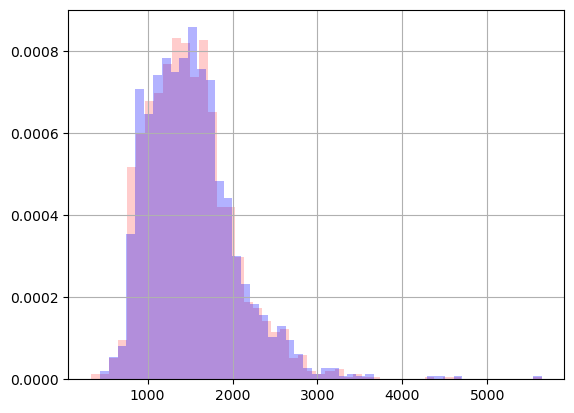

In [14]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

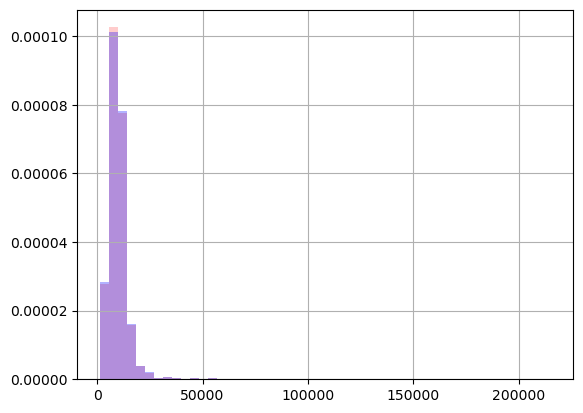

In [15]:
dataHP['LotArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

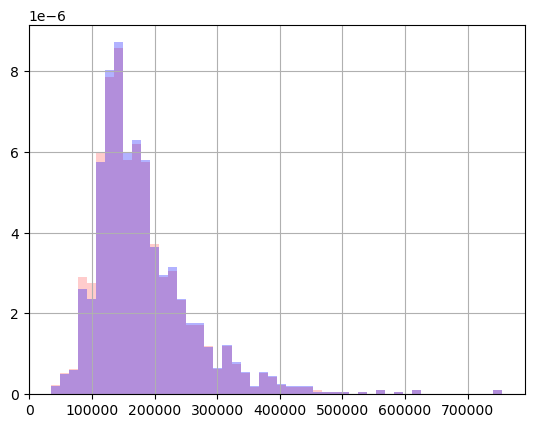

In [16]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

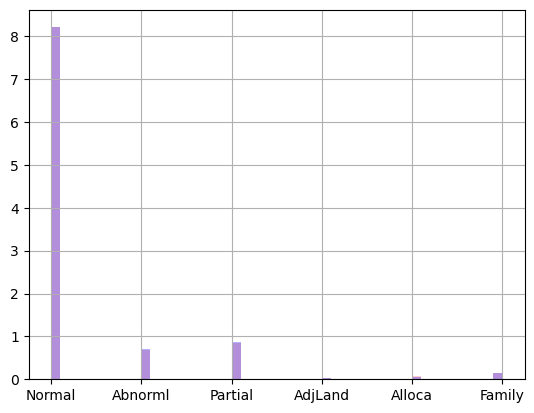

In [17]:
dataHP['SaleCondition'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SaleCondition'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

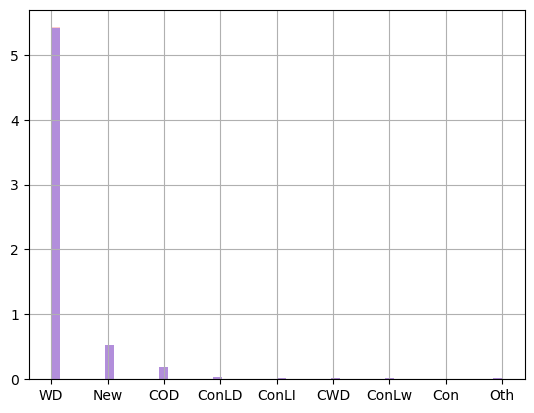

In [18]:
dataHP['SaleType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SaleType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

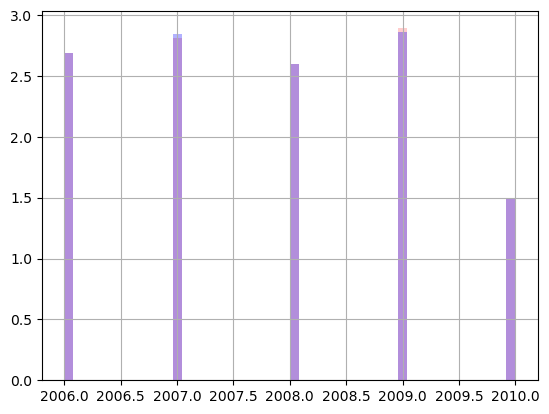

In [19]:
dataHP['YrSold'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YrSold'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

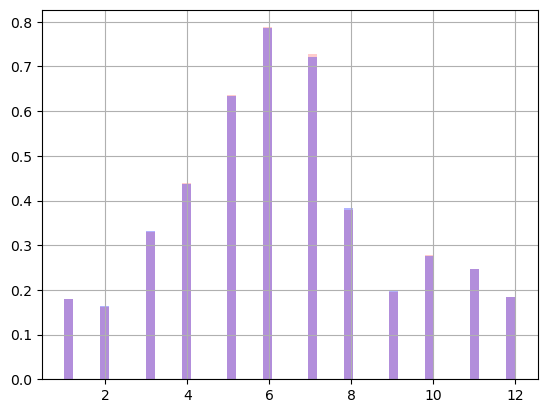

In [20]:
dataHP['MoSold'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MoSold'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

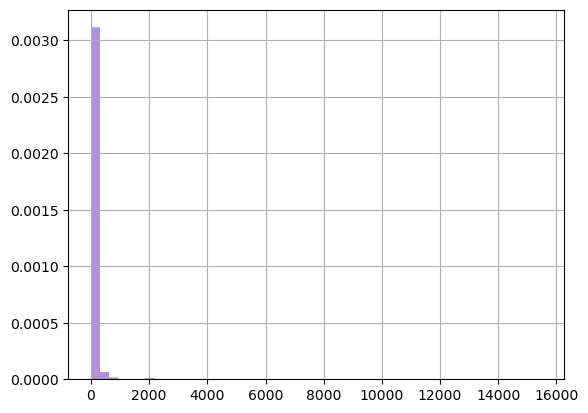

In [21]:
dataHP['MiscVal'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MiscVal'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

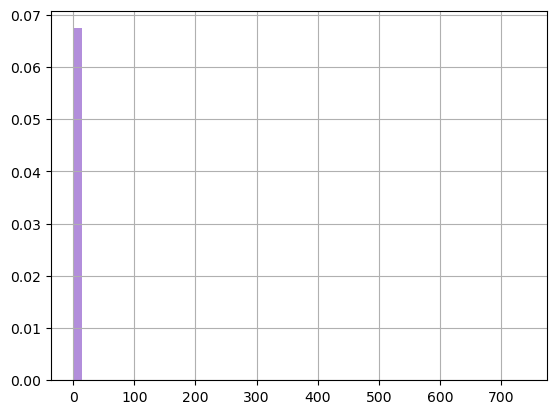

In [22]:
dataHP['PoolArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['PoolArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

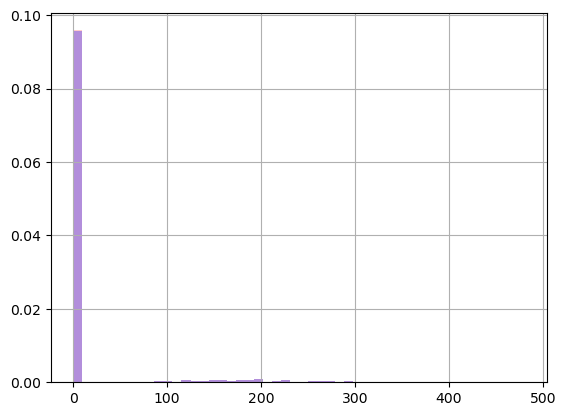

In [23]:
dataHP['ScreenPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ScreenPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

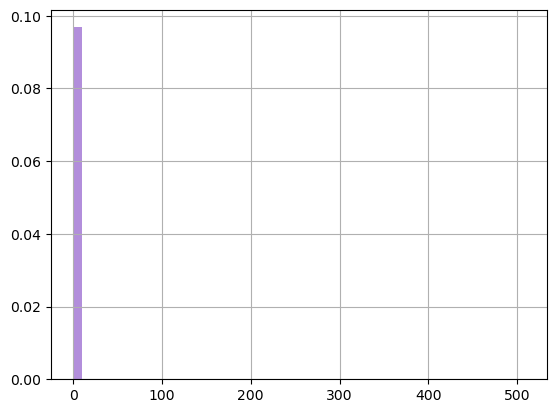

In [24]:
dataHP['3SsnPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['3SsnPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

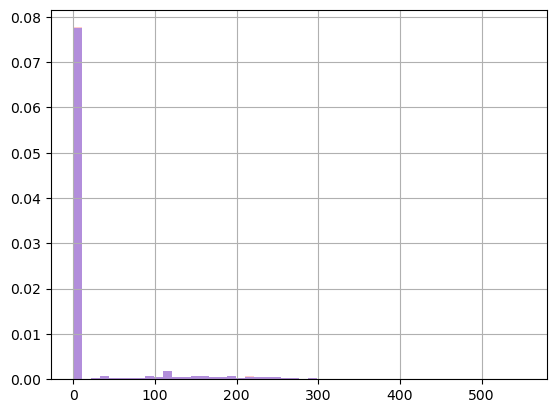

In [25]:
dataHP['EnclosedPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['EnclosedPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

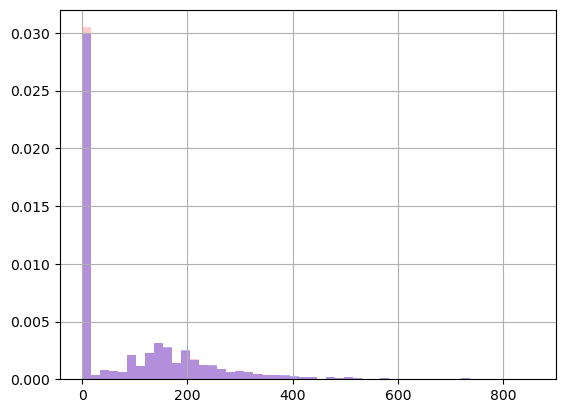

In [26]:
dataHP['WoodDeckSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['WoodDeckSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

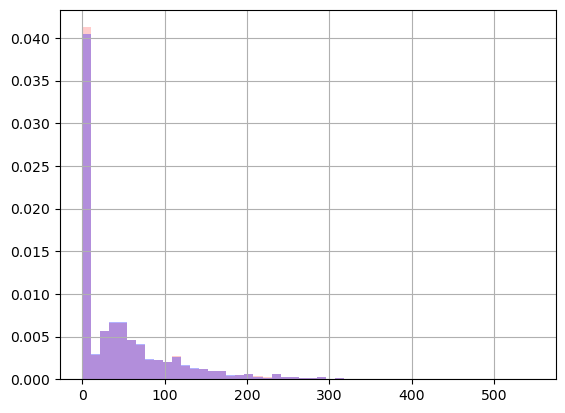

In [27]:
dataHP['OpenPorchSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OpenPorchSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

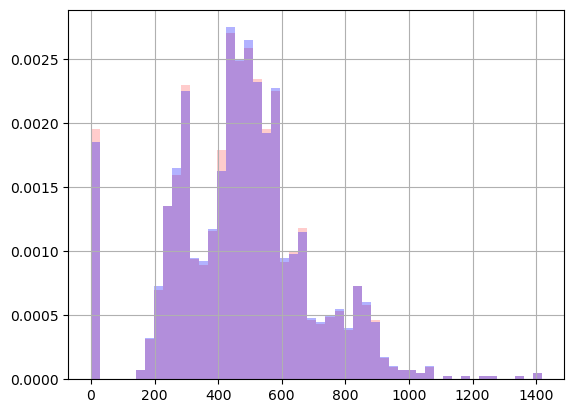

In [28]:
dataHP['GarageArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GarageArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

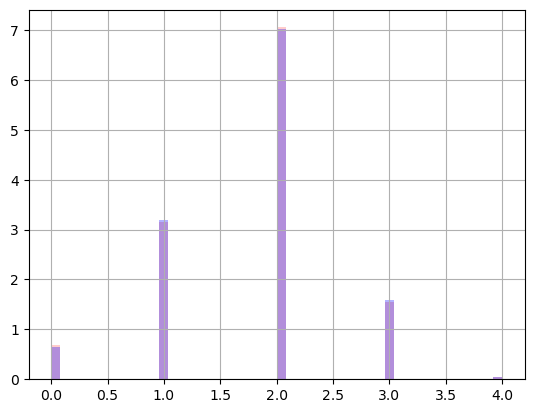

In [29]:
dataHP['GarageCars'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GarageCars'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

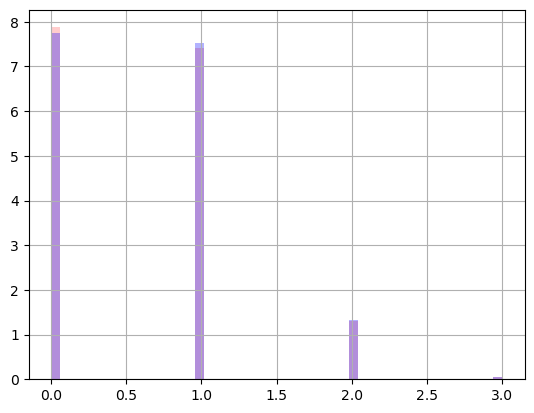

In [30]:
dataHP['Fireplaces'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Fireplaces'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

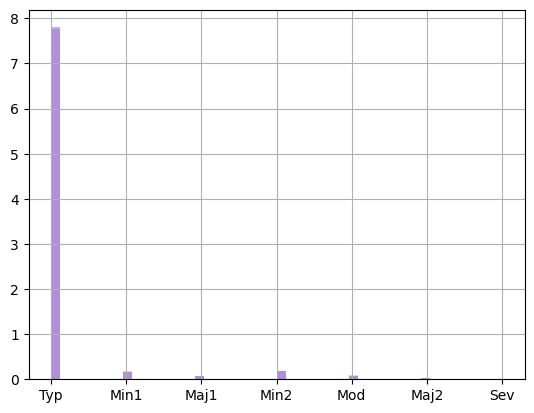

In [31]:
dataHP['Functional'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Functional'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

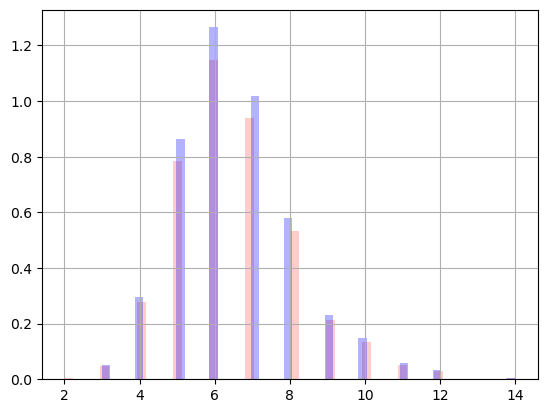

In [32]:
dataHP['TotRmsAbvGrd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['TotRmsAbvGrd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

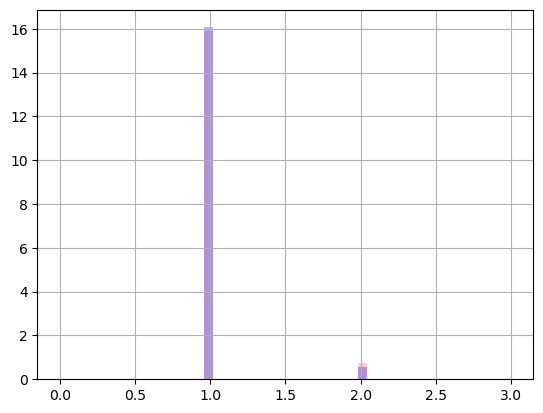

In [33]:
dataHP['KitchenAbvGr'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['KitchenAbvGr'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

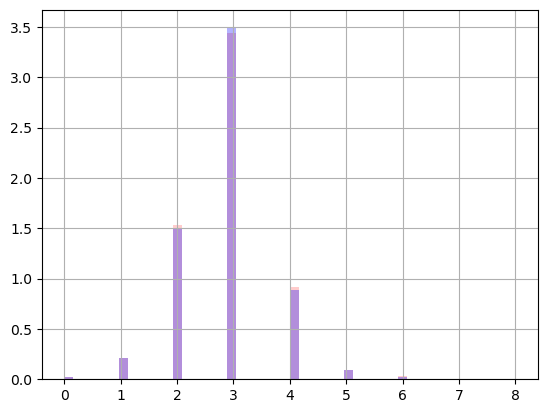

In [34]:
dataHP['BedroomAbvGr'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BedroomAbvGr'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

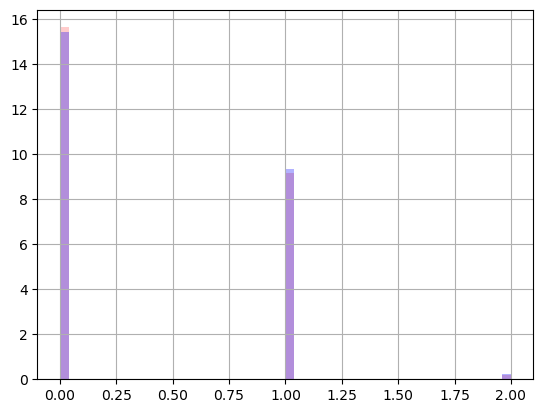

In [35]:
dataHP['HalfBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HalfBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

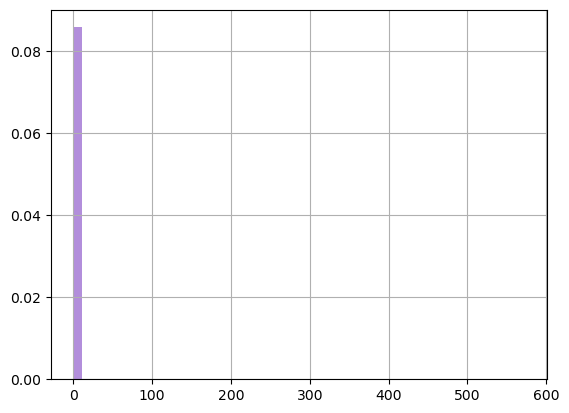

In [36]:
dataHP['LowQualFinSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LowQualFinSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

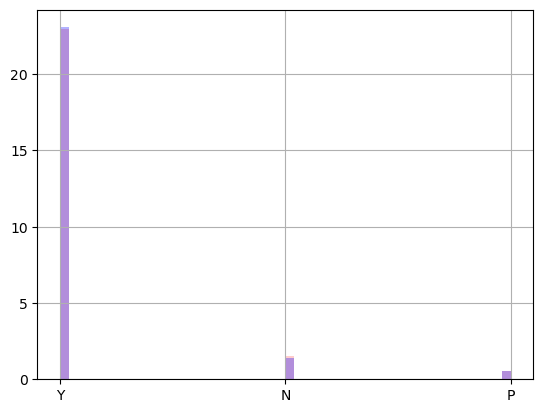

In [37]:
dataHP['PavedDrive'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['PavedDrive'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

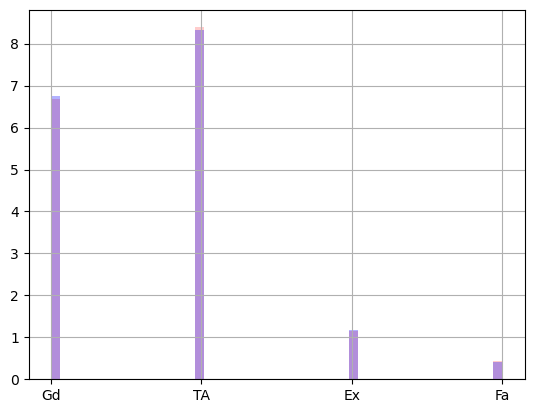

In [38]:
dataHP['KitchenQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['KitchenQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

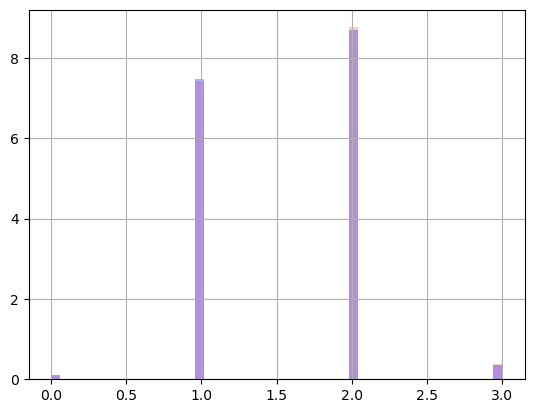

In [39]:
dataHP['FullBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['FullBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

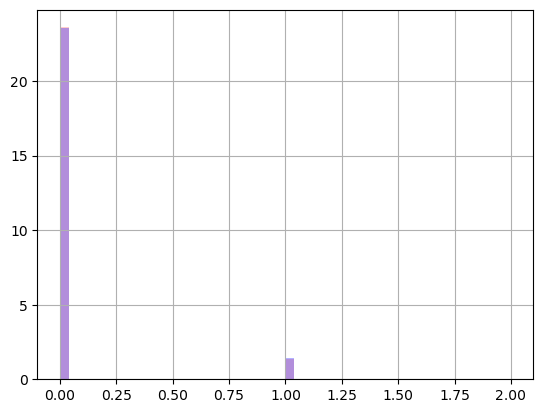

In [40]:
dataHP['BsmtHalfBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtHalfBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

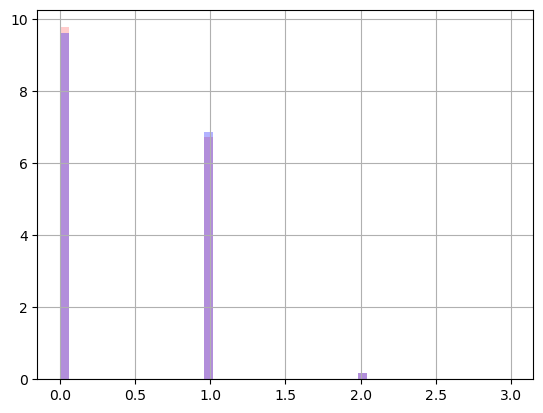

In [41]:
dataHP['BsmtFullBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFullBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

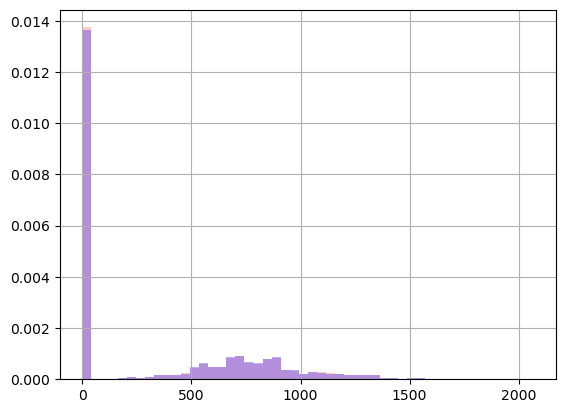

In [42]:
dataHP['2ndFlrSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['2ndFlrSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

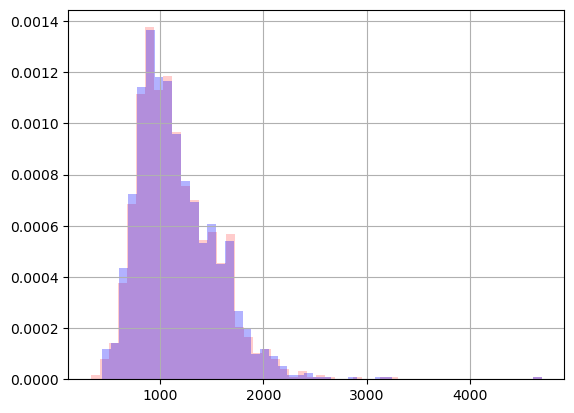

In [43]:
dataHP['1stFlrSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['1stFlrSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

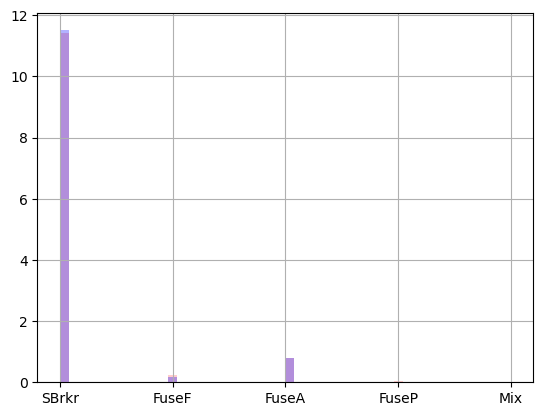

In [44]:
dataHP['Electrical'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Electrical'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

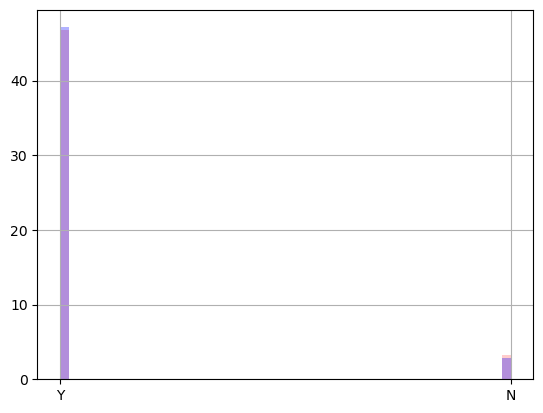

In [45]:
dataHP['CentralAir'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['CentralAir'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

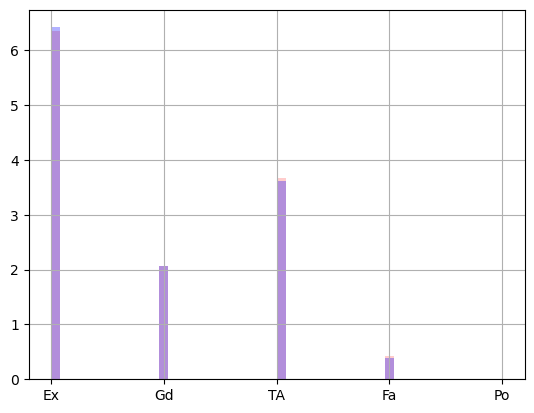

In [46]:
dataHP['HeatingQC'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HeatingQC'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

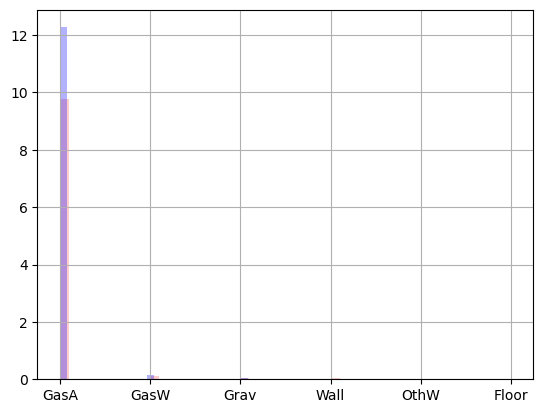

In [47]:
dataHP['Heating'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Heating'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

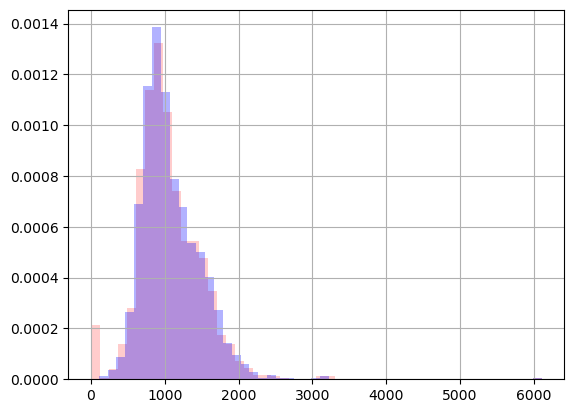

In [48]:
dataHP['TotalBsmtSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['TotalBsmtSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

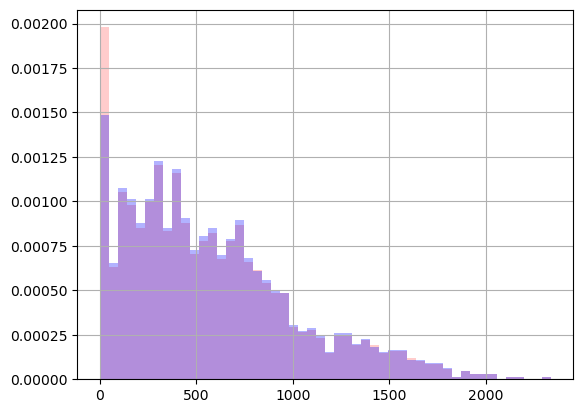

In [50]:
dataHP['BsmtUnfSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtUnfSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

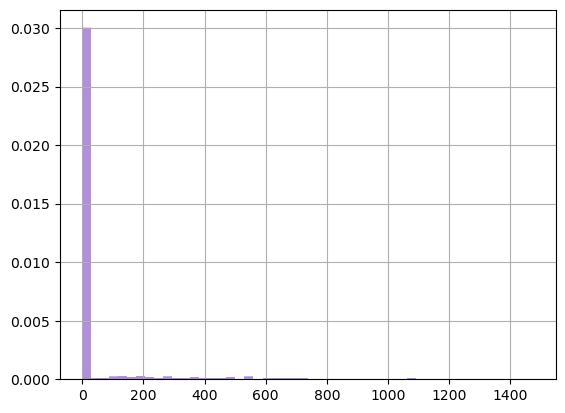

In [51]:
dataHP['BsmtFinSF2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinSF2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

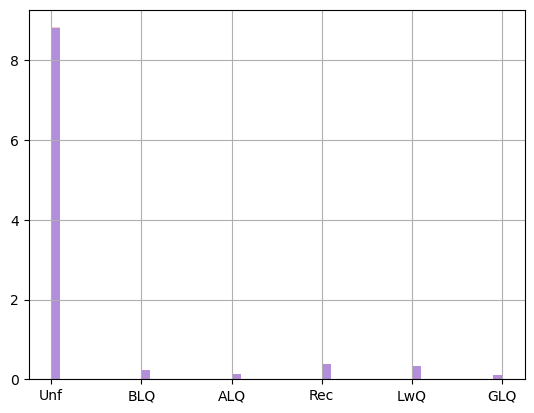

In [52]:
dataHP['BsmtFinType2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinType2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

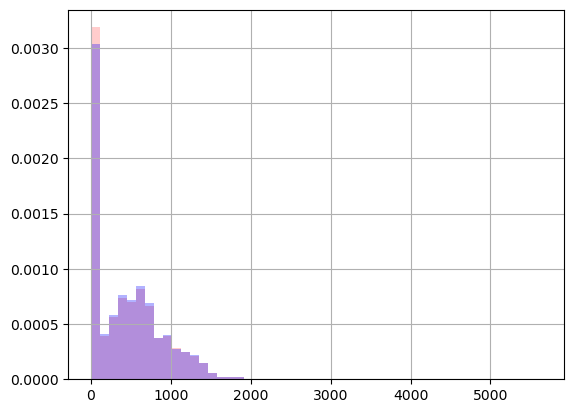

In [53]:
dataHP['BsmtFinSF1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinSF1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

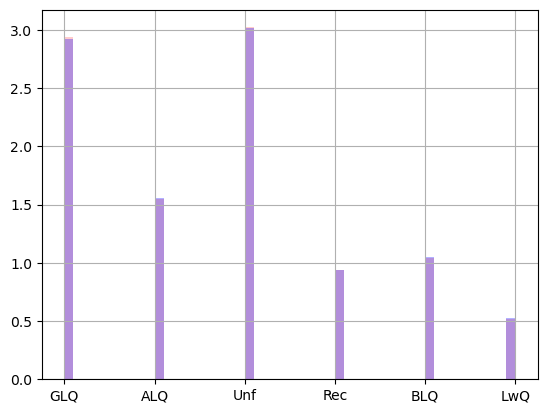

In [54]:
dataHP['BsmtFinType1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinType1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

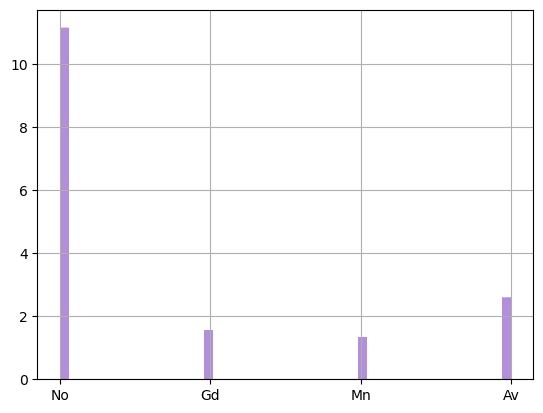

In [55]:
dataHP['BsmtExposure'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtExposure'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

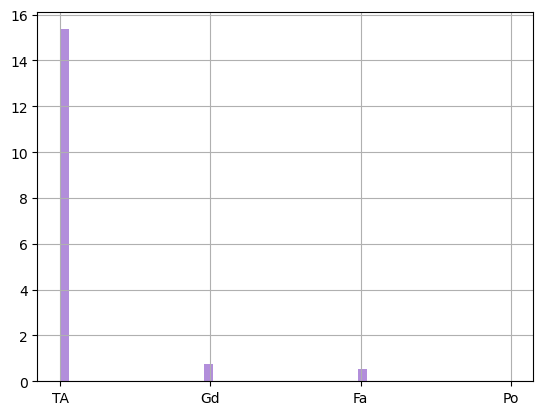

In [56]:
dataHP['BsmtCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

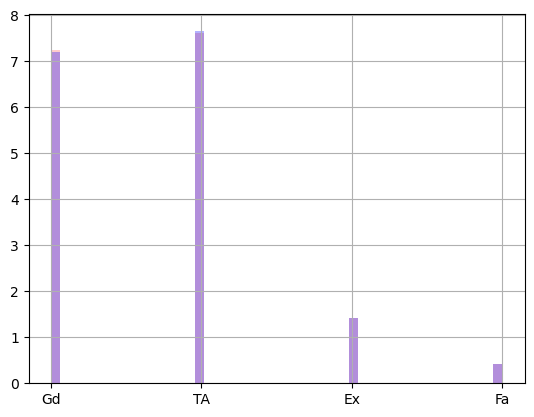

In [57]:
dataHP['BsmtQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

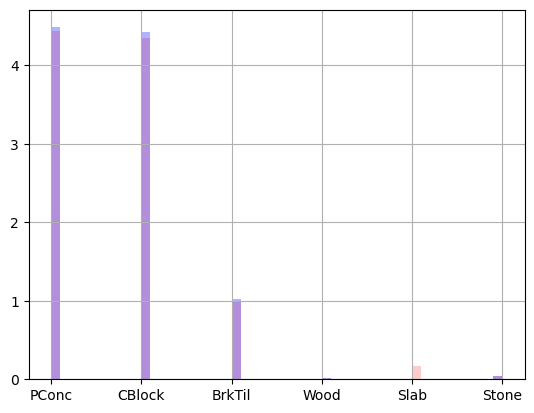

In [58]:
dataHP['Foundation'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Foundation'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

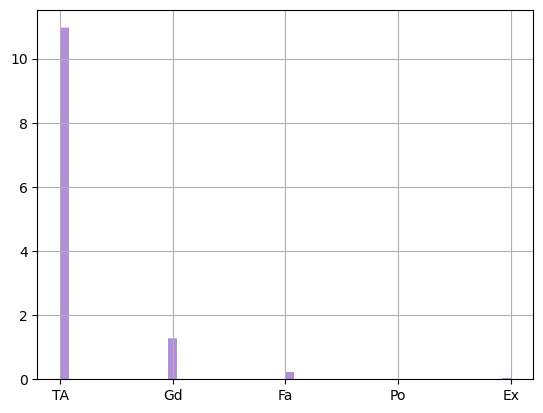

In [59]:
dataHP['ExterCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ExterCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

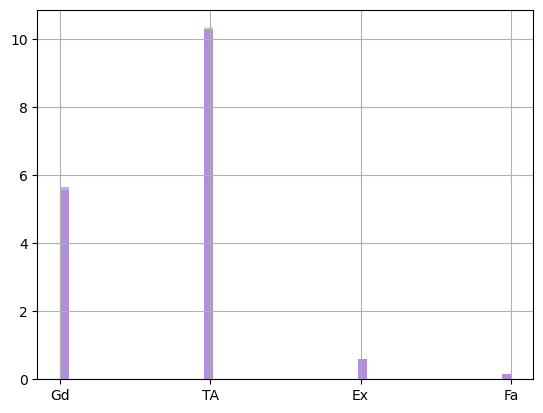

In [60]:
dataHP['ExterQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ExterQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

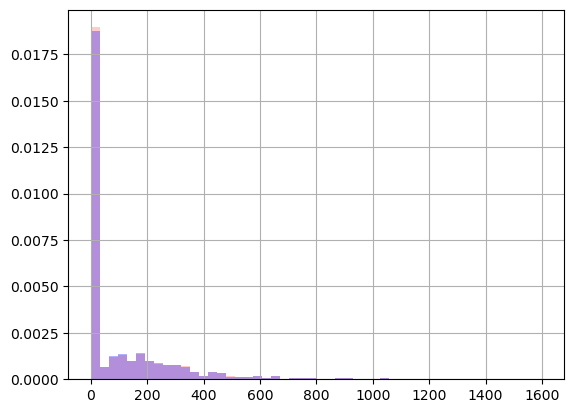

In [61]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MasVnrArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

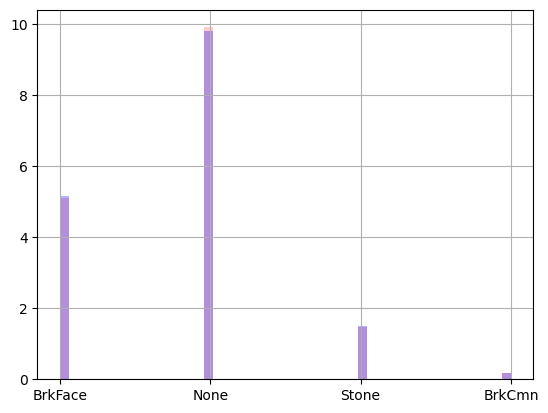

In [62]:
dataHP['MasVnrType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MasVnrType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

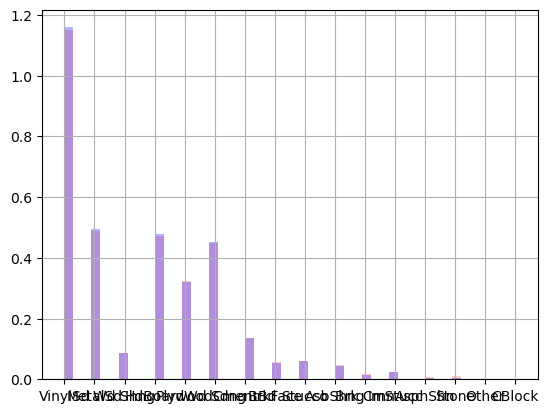

In [63]:
dataHP['Exterior2nd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior2nd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

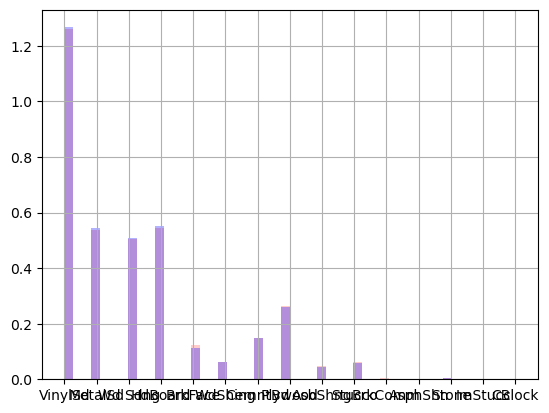

In [64]:
dataHP['Exterior1st'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior1st'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

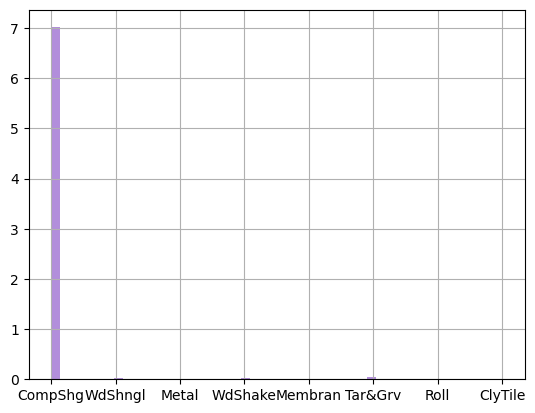

In [65]:
dataHP['RoofMatl'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['RoofMatl'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

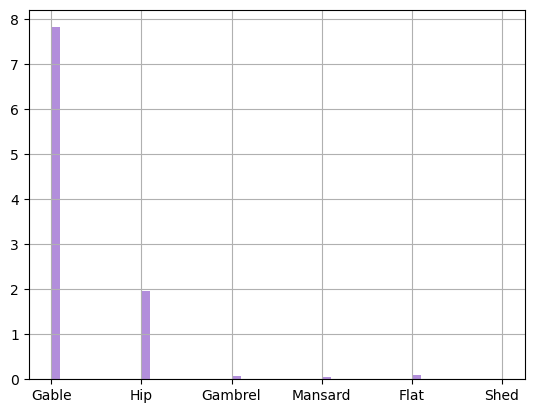

In [66]:
dataHP['RoofStyle'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['RoofStyle'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

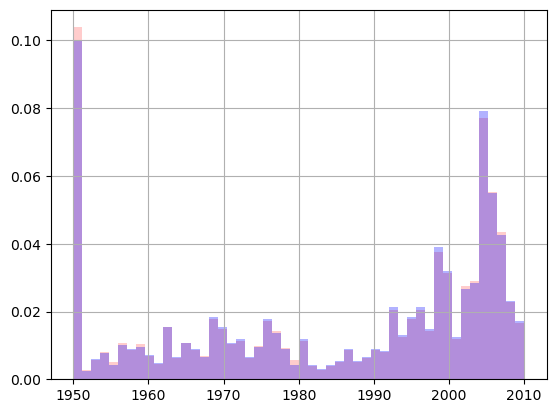

In [67]:
dataHP['YearRemodAdd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearRemodAdd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

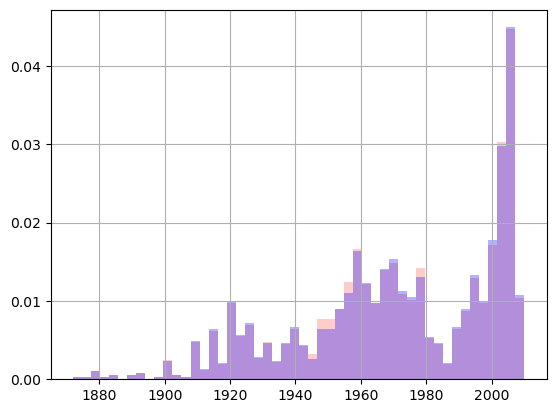

In [68]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

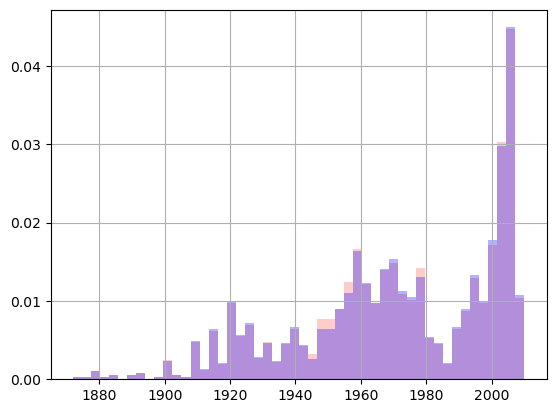

In [69]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

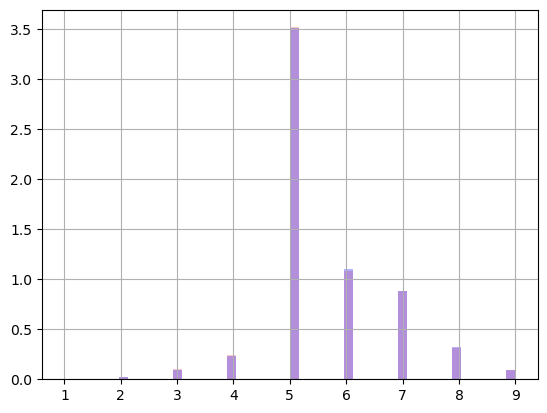

In [70]:
dataHP['OverallCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OverallCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

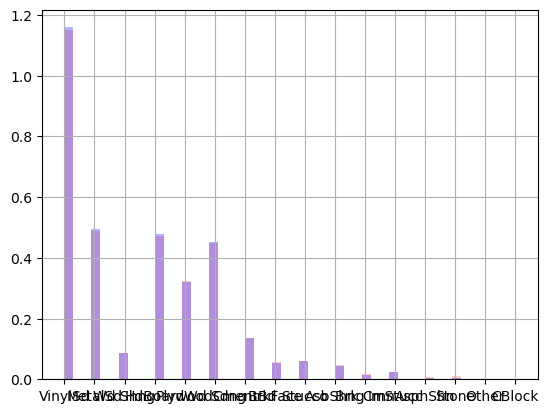

In [71]:
dataHP['Exterior2nd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior2nd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

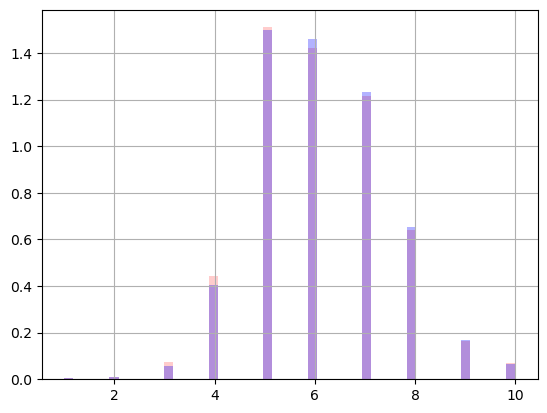

In [72]:
dataHP['OverallQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OverallQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

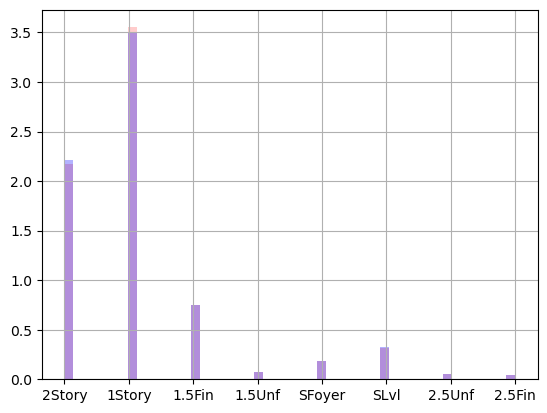

In [73]:
dataHP['HouseStyle'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HouseStyle'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

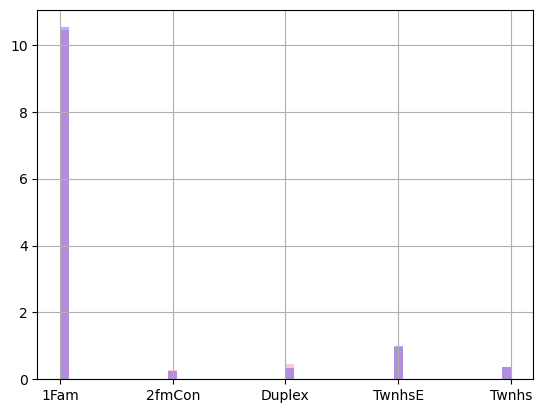

In [74]:
dataHP['BldgType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BldgType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

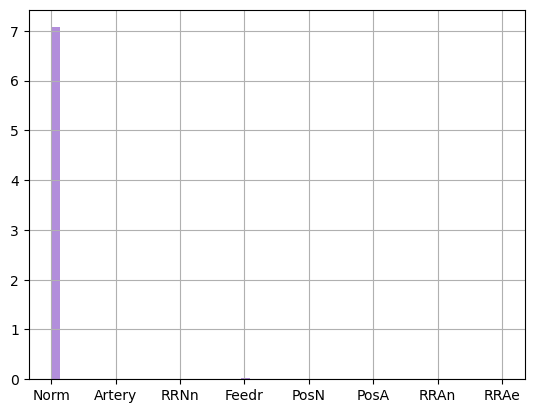

In [75]:
dataHP['Condition2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Condition2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

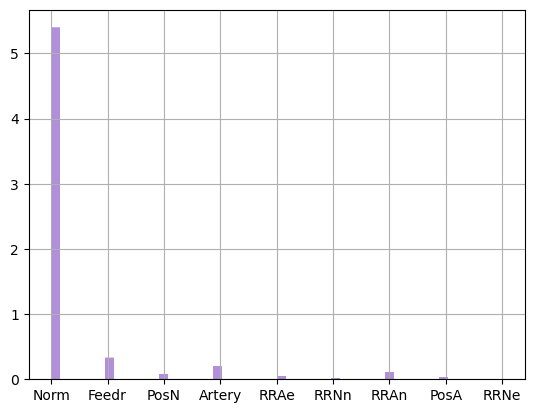

In [76]:
dataHP['Condition1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Condition1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

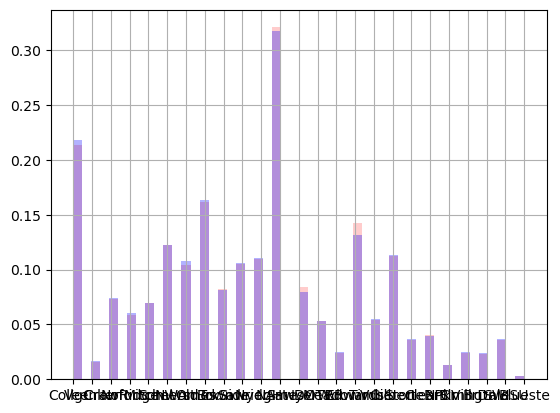

In [77]:
dataHP['Neighborhood'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Neighborhood'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

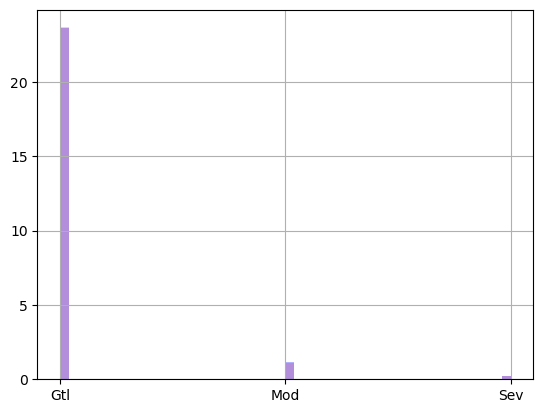

In [78]:
dataHP['LandSlope'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LandSlope'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

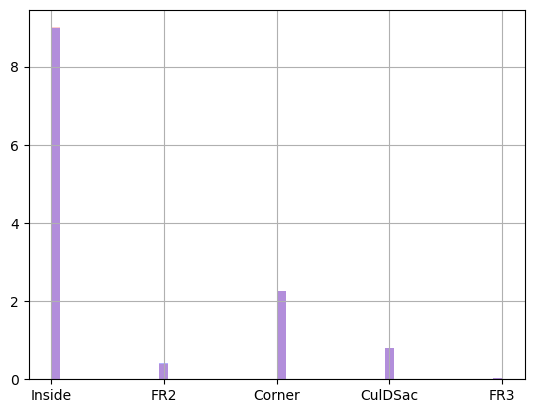

In [79]:
dataHP['LotConfig'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotConfig'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

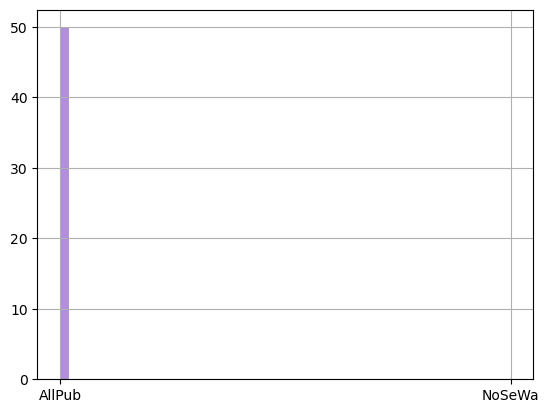

In [80]:
dataHP['Utilities'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Utilities'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

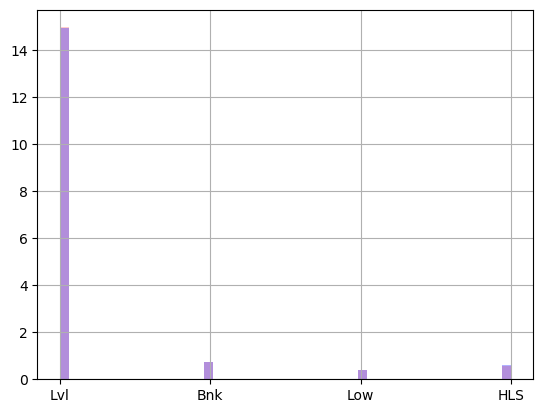

In [81]:
dataHP['LandContour'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LandContour'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

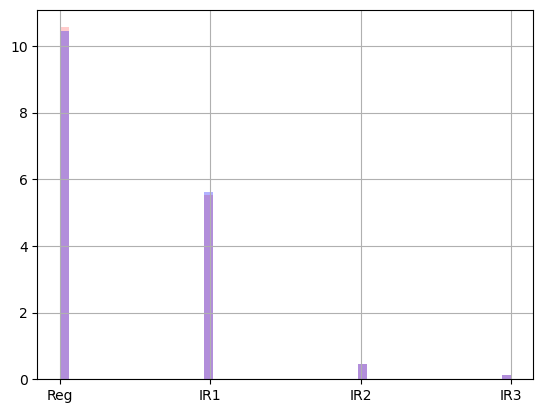

In [82]:
dataHP['LotShape'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotShape'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

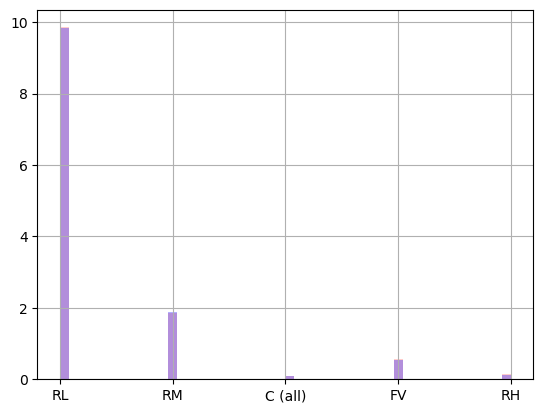

In [83]:
dataHP['MSZoning'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MSZoning'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

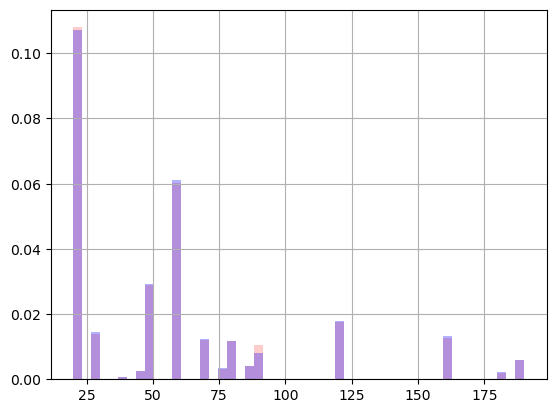

In [84]:
dataHP['MSSubClass'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MSSubClass'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

In [85]:
dataTitanic=pd.read_csv('titanic.csv')
dataTitanica=dataTitanic[['Survived','Age', 'Fare']]
dataTitanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [86]:
dataTitanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [87]:
media=dataTitanic['Age'].mean()
mediana=dataTitanic['Age'].median()
print(f"Media:{media}")
print(f"Median:{mediana}")

Media:29.69911764705882
Median:28.0


In [88]:
dataTitanic['Age_Mean']=np.round(dataTitanic['Age'].fillna(media))
dataTitanic['Age_Median'] = np.round(dataTitanic['Age'].fillna(mediana))

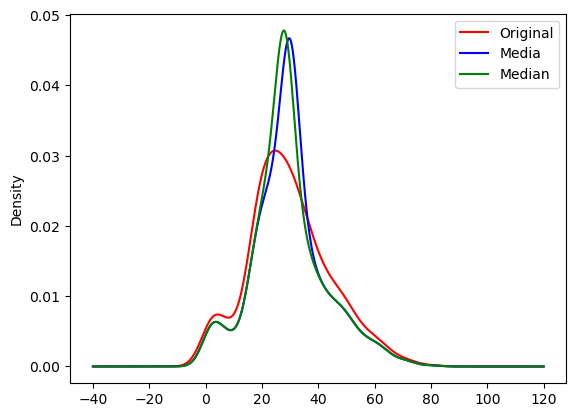

In [89]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataTitanic['Age'].plot.density(color='red',label='Original')
dataTitanic['Age_Mean'].plot.density(color='blue',label='Media')
dataTitanic['Age_Median'].plot.density(color='green',label='Median')
plt.show
ax.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

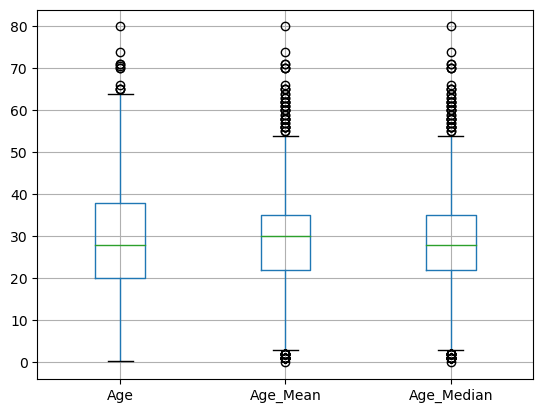

In [90]:
dataTitanic[['Age','Age_Mean','Age_Median']].boxplot()
plt.show

In [91]:
dataset_cat_missing=dataHP[['BsmtQual','FireplaceQu','SalePrice']]
dataset_cat_missing.head()

BsmtQual FireplaceQu  SalePrice
0       Gd         NaN     208500
1       Gd          TA     181500
2       Gd          TA     223500
3       TA          Gd     140000
4       Gd          TA     250000

In [92]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [93]:
dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [94]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

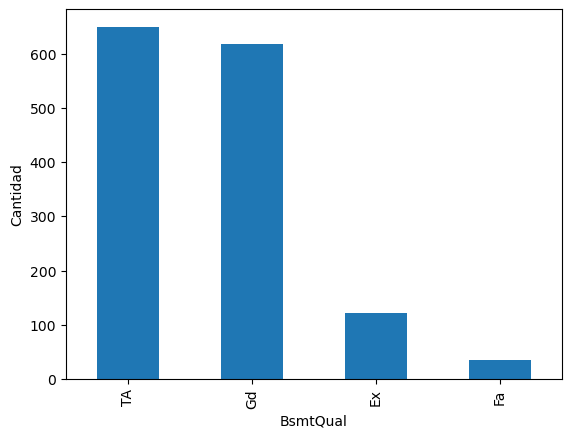

In [95]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

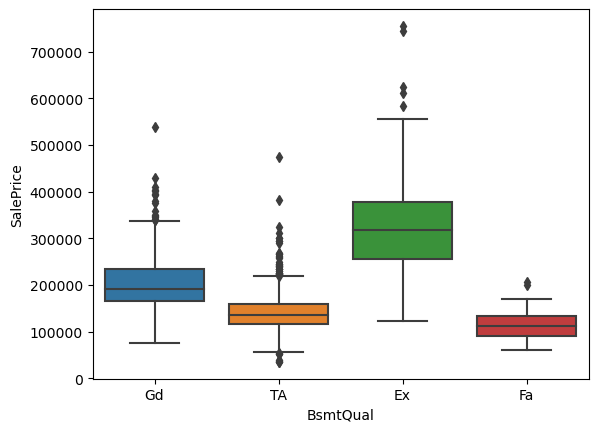

In [96]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['BsmtQual'],y=dataset_cat_missing['SalePrice'])
plt.show()

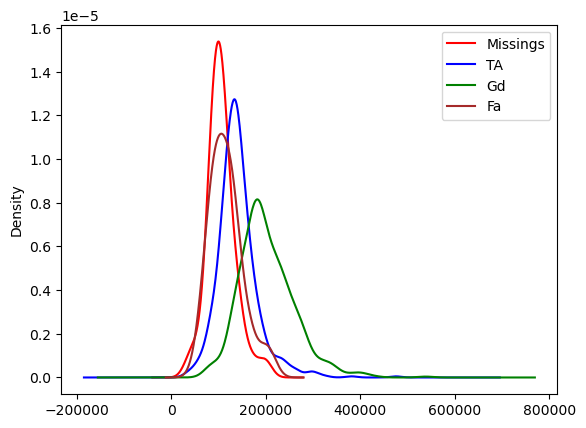

In [97]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Fa']['SalePrice'].plot(kind="kde",color="Brown",label="Fa")
ax.legend()
plt.show()


In [98]:
dataset_cat_missing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [99]:
dataset_cat_missing['FireplaceQu'].value_counts()/len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

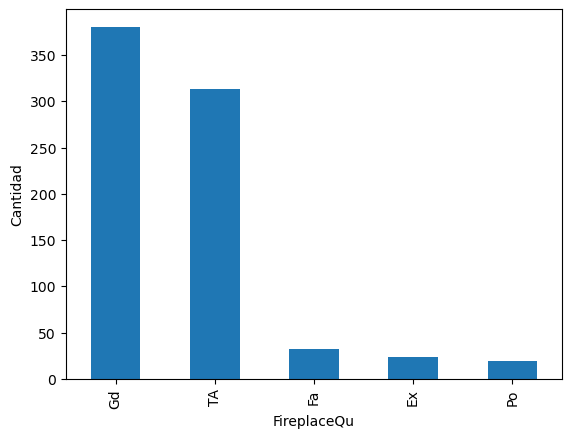

In [100]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("FireplaceQu")
plt.show()

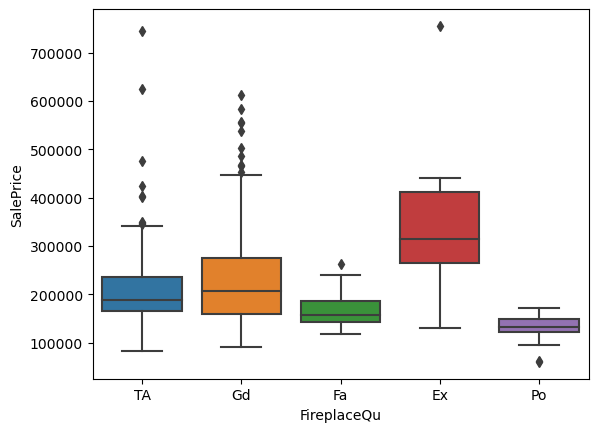

In [101]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

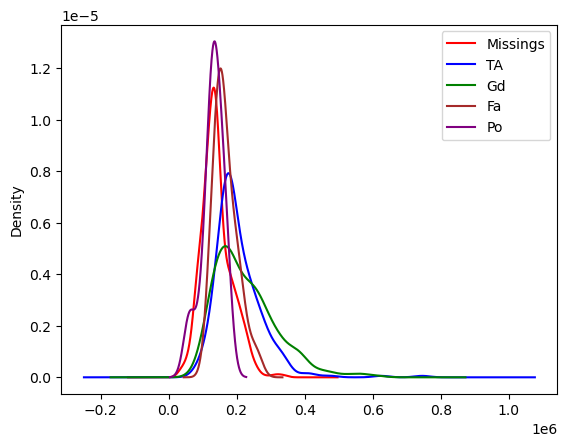

In [102]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Fa']['SalePrice'].plot(kind="kde",color="brown",label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Po']['SalePrice'].plot(kind="kde",color="purple",label="Po")
ax.legend()
plt.show()


In [103]:
###Imputación de datos categoricos 
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)

C:\Users\cindy\AppData\Local\Temp\ipykernel_31592\2389707929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)


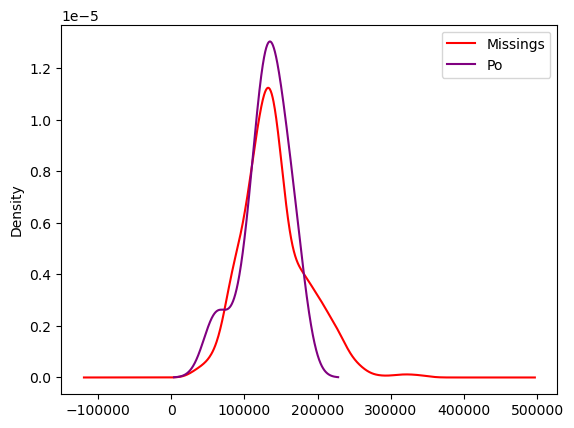

In [104]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Po']['SalePrice'].plot(kind="kde",color="purple",label="Po")
ax.legend()
plt.show()

In [105]:
###Imputación de datos categoricos 
dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)

C:\Users\cindy\AppData\Local\Temp\ipykernel_31592\1424755496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)


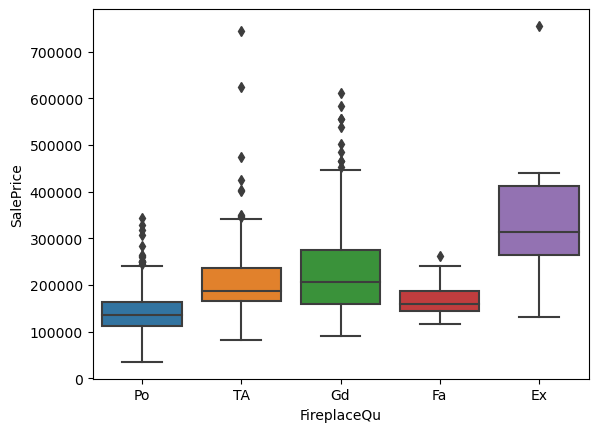

In [106]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

In [107]:
###Codificación de Variables Categóricas

In [108]:
def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [109]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [110]:
cat_cols.append('SalePrice')

In [111]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

In [112]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [113]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [114]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [115]:
pd.get_dummies(dataset_categories['MSZoning'])

C (all)  FV  RH  RL  RM
0           0   0   0   1   0
1           0   0   0   1   0
2           0   0   0   1   0
3           0   0   0   1   0
4           0   0   0   1   0
...       ...  ..  ..  ..  ..
1455        0   0   0   1   0
1456        0   0   0   1   0
1457        0   0   0   1   0
1458        0   0   0   1   0
1459        0   0   0   1   0

[1460 rows x 5 columns]

In [116]:
dataset_categories.shape

(1460, 44)

In [117]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.shape

(1460, 253)

In [118]:
###Frequency Encoding (Frecuencia)

In [119]:
dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

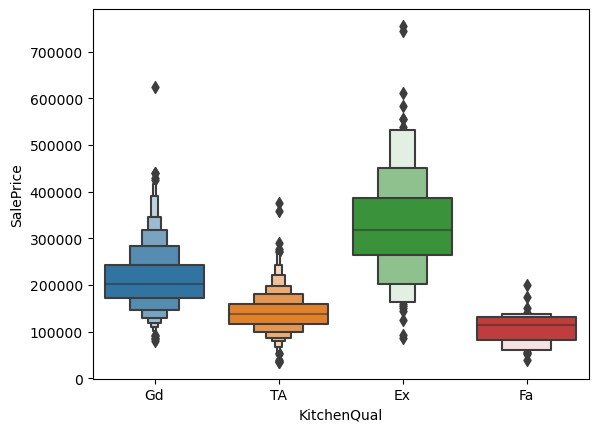

In [120]:
sns.boxenplot(x=dataset_categories['KitchenQual'],y=dataset_categories['SalePrice'])
plt.show()

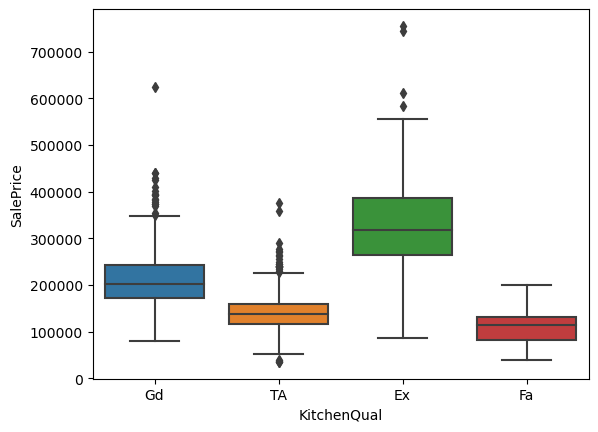

In [121]:
sns.boxplot(x=dataset_categories['KitchenQual'],y=dataset_categories['SalePrice'])
plt.show()

In [122]:
KitchenQual_freq_mapper=(dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
KitchenQual_freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [123]:
dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)
dataset_categories[['KitchenQual','KitchenQual_code']]

C:\Users\cindy\AppData\Local\Temp\ipykernel_31592\2520136808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)


KitchenQual  KitchenQual_code
0             Gd               586
1             TA               735
2             Gd               586
3             Gd               586
4             Gd               586
...          ...               ...
1455          TA               735
1456          TA               735
1457          Gd               586
1458          Gd               586
1459          TA               735

[1460 rows x 2 columns]

In [127]:
dataset=dataHP
continuas=[]
discretas=[]
for col in dataset.columns:
    if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
        print(col)
        

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [126]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [133]:
dataset=dataHP

def getColumnTypes(dataset):
###Descripción: Esta función extrae el tipo de dominio de las columnas de un dataset.
###Entradas: Pandas Dataframe
###Salida: Tupla con arreglo que contiene nombres de las columnas
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [139]:
continuas, discretas, categoricas=getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [140]:
import scipy.stats as stats

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

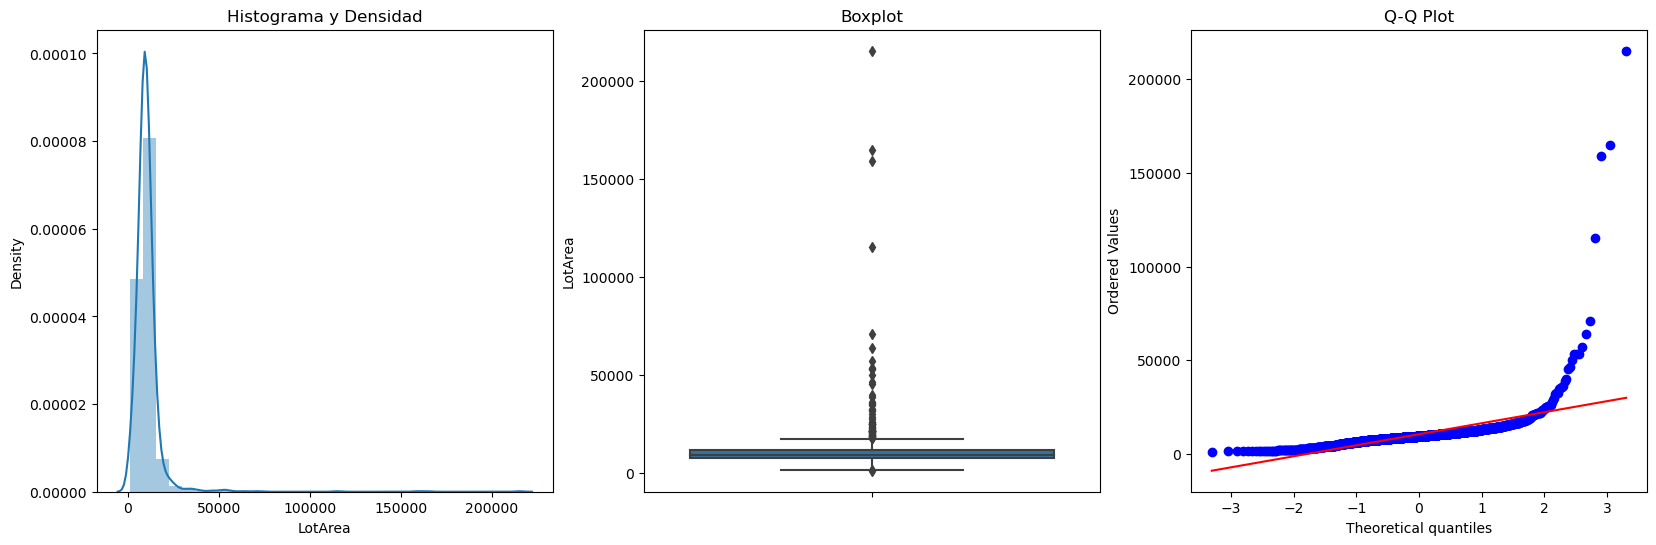

In [141]:

dataset=dataHP
col ='LotArea'
def plotDistBoxQQ(dataset,col)

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

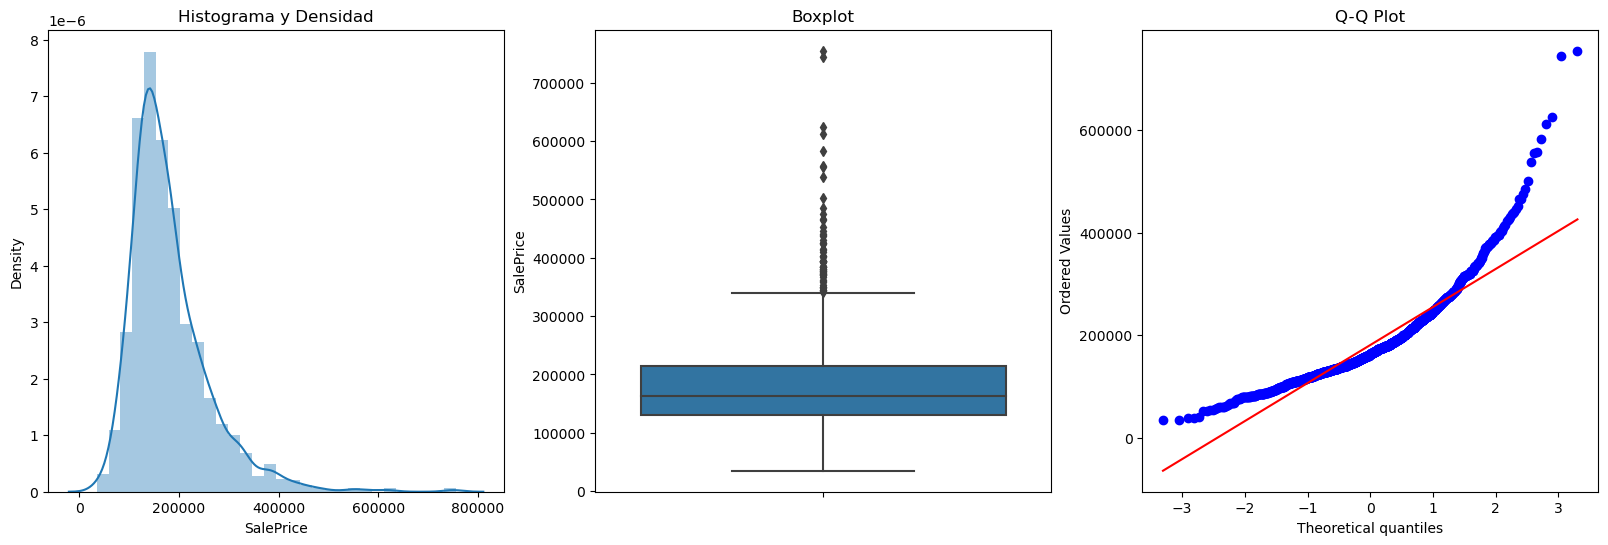

In [142]:


dataset=dataHP
col ='SalePrice'

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

In [147]:
def plotDistBoxQQ(dataset,col):

###descripcion: Muestra las graficas de Distribucion, Boxplot y QQ-Plot para detectar Outliers imput:dataset-> pandas datagrame, col ->string con nombre de columna output: visualización de plots.

    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")


    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'RL'

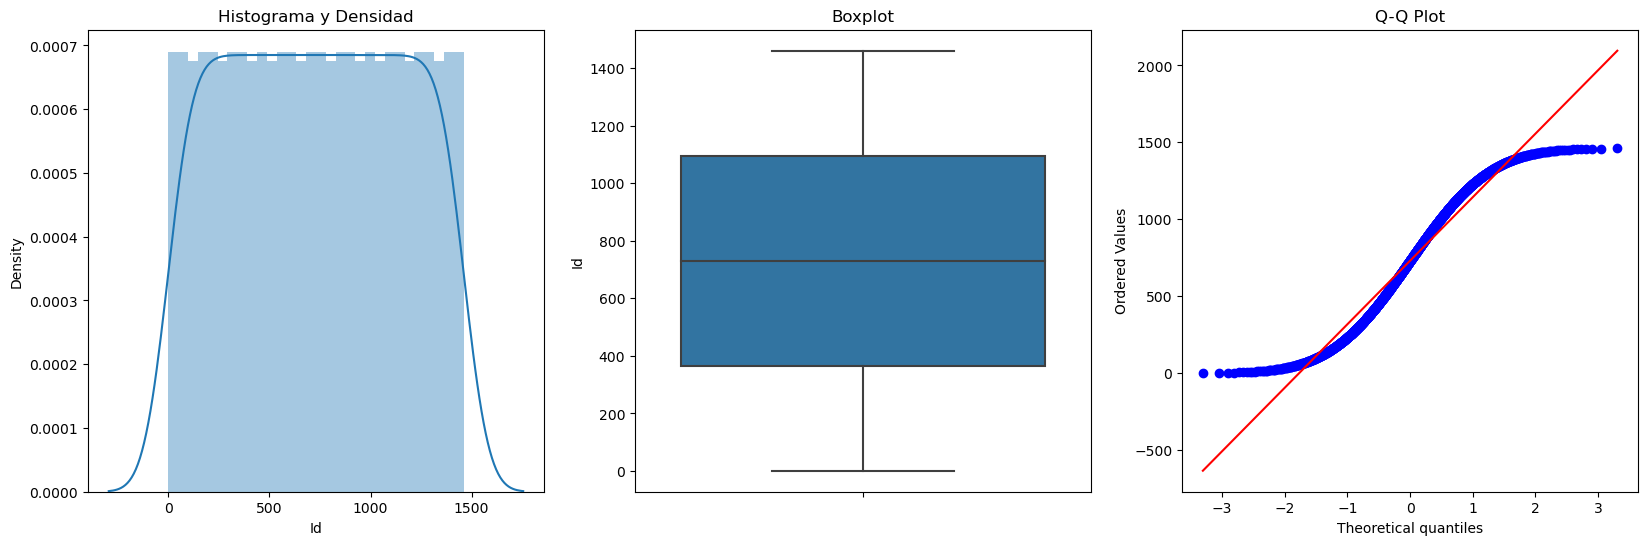

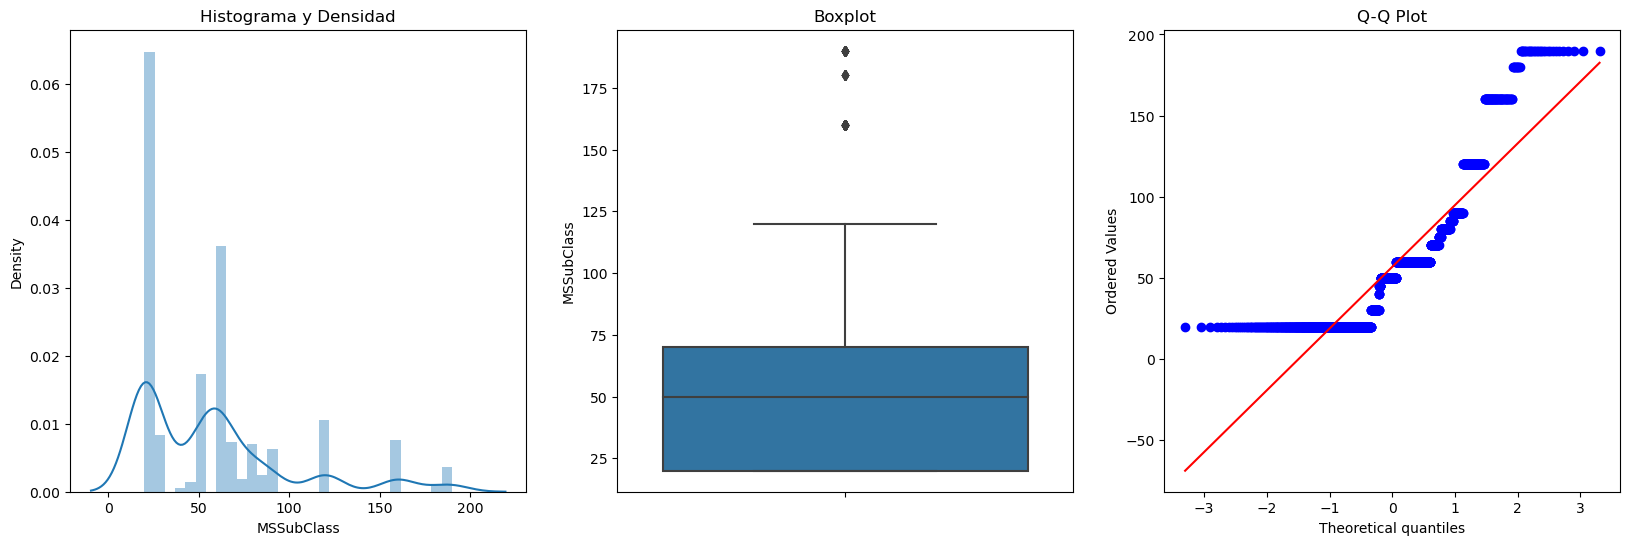

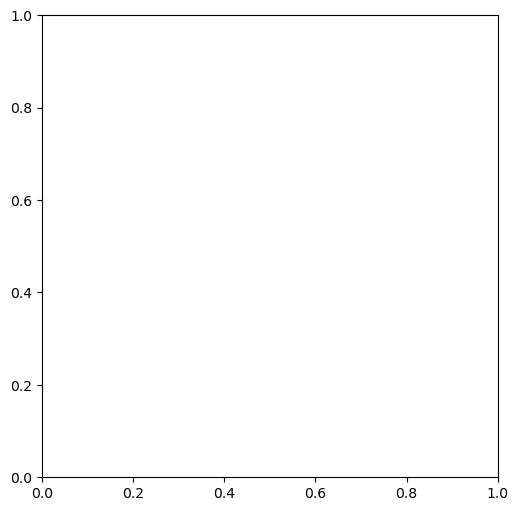

In [148]:
for col in dataHP.columns:
    plotDistBoxQQ(dataHP,col)
    

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

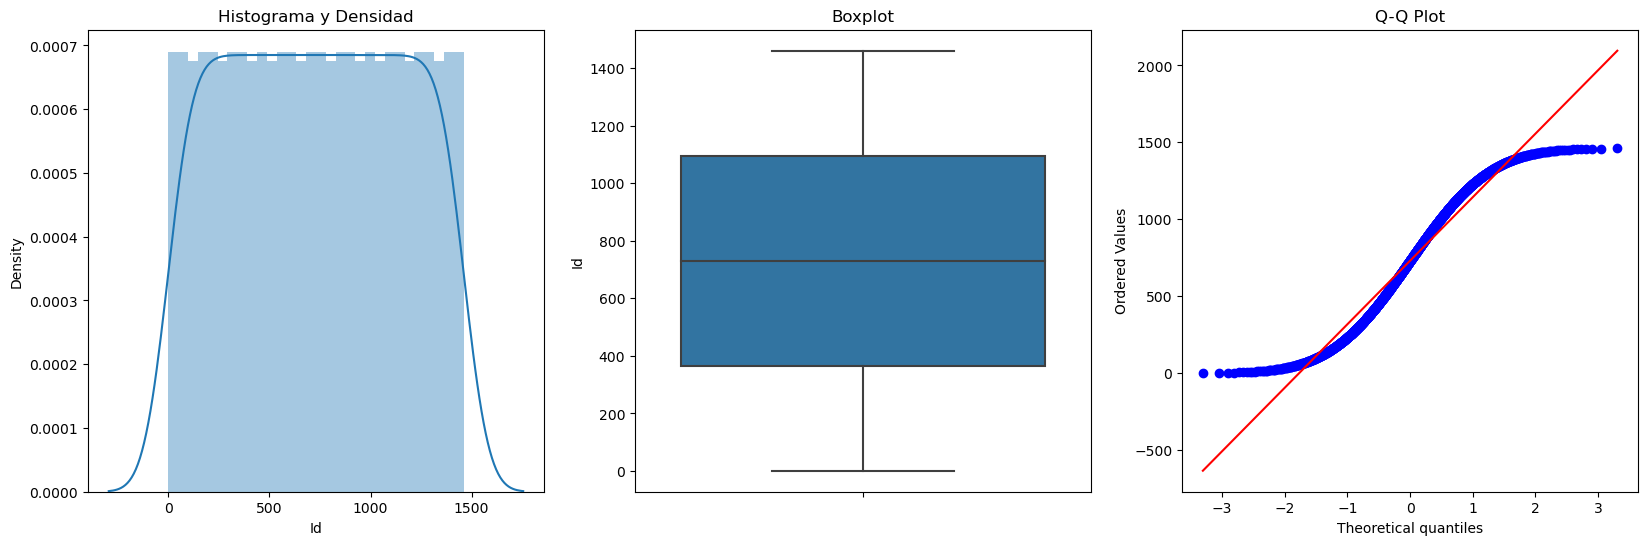

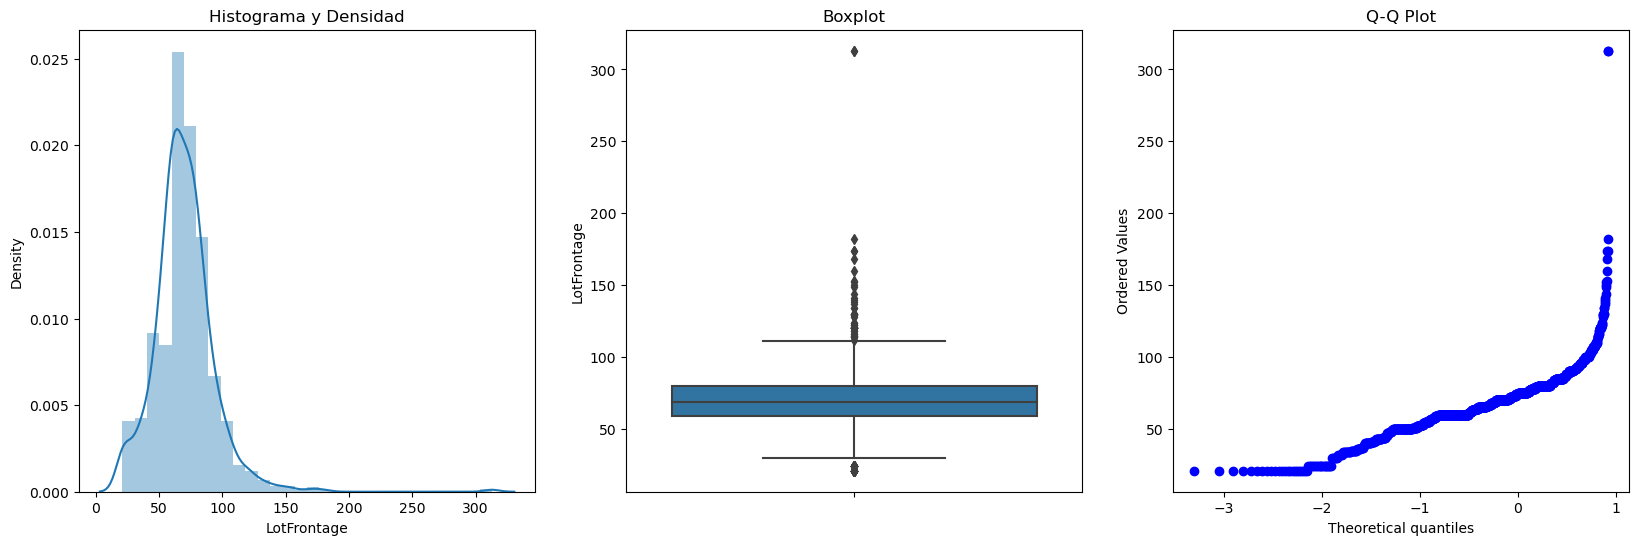

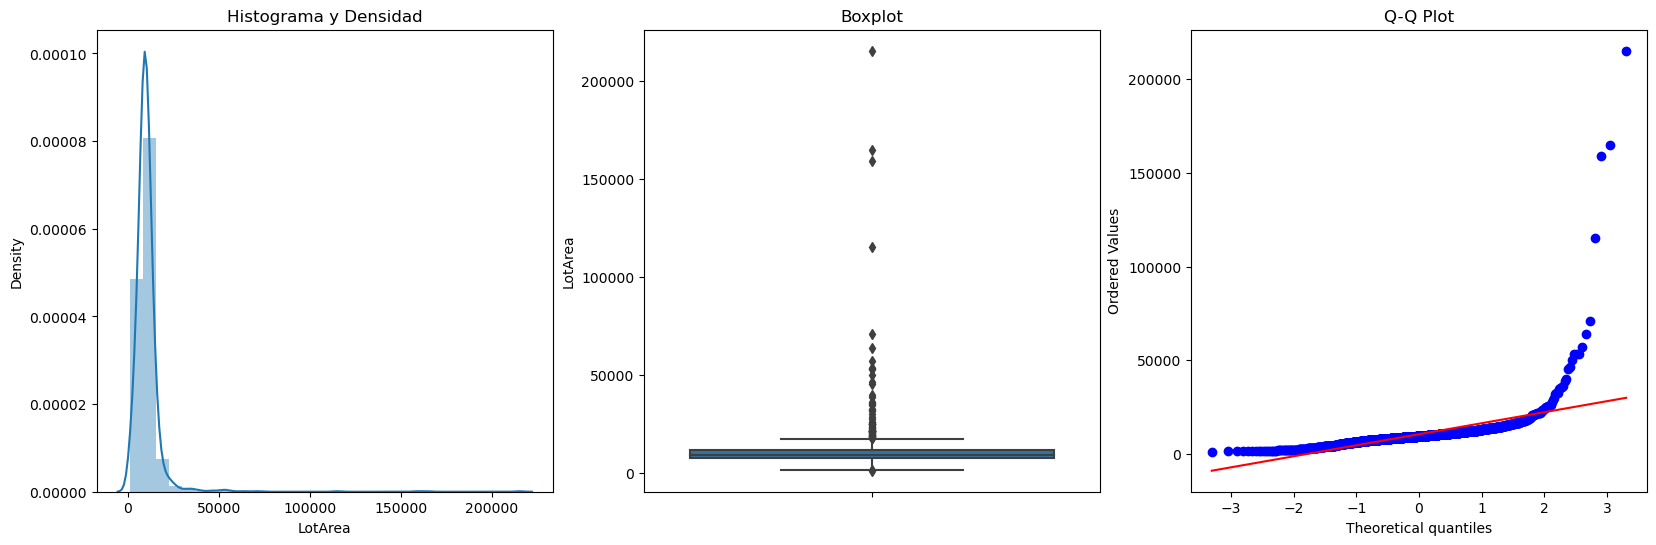

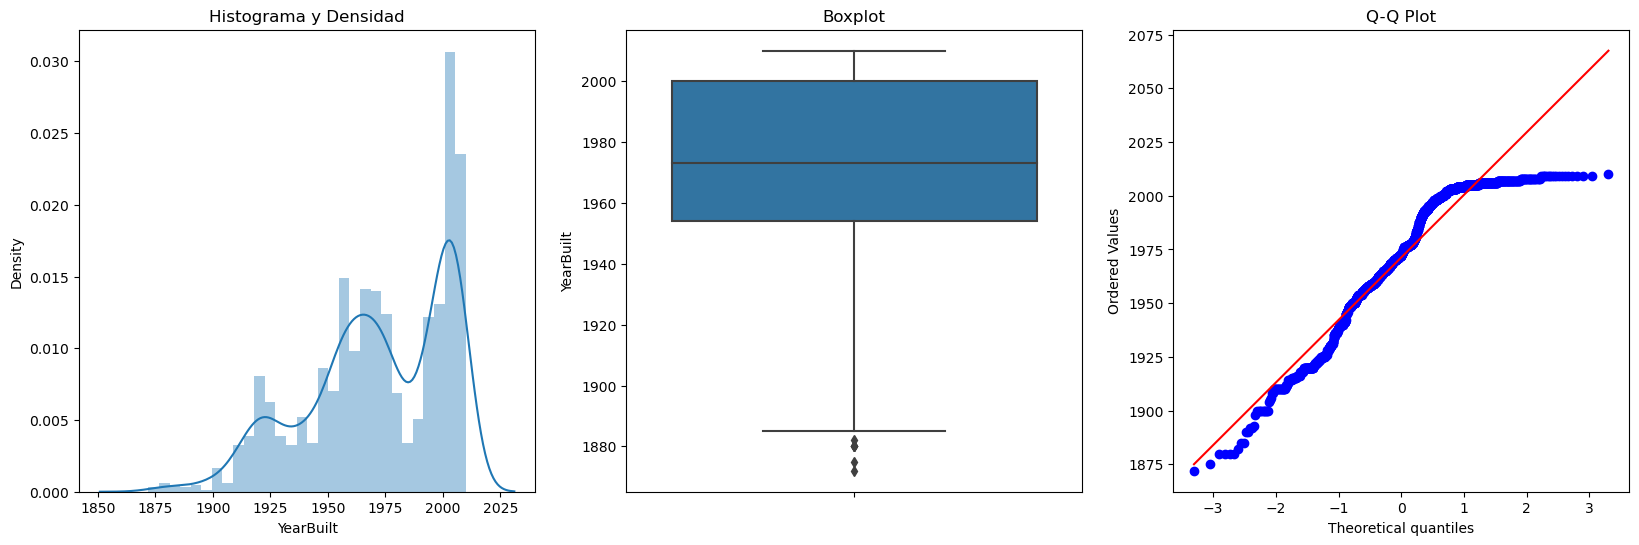

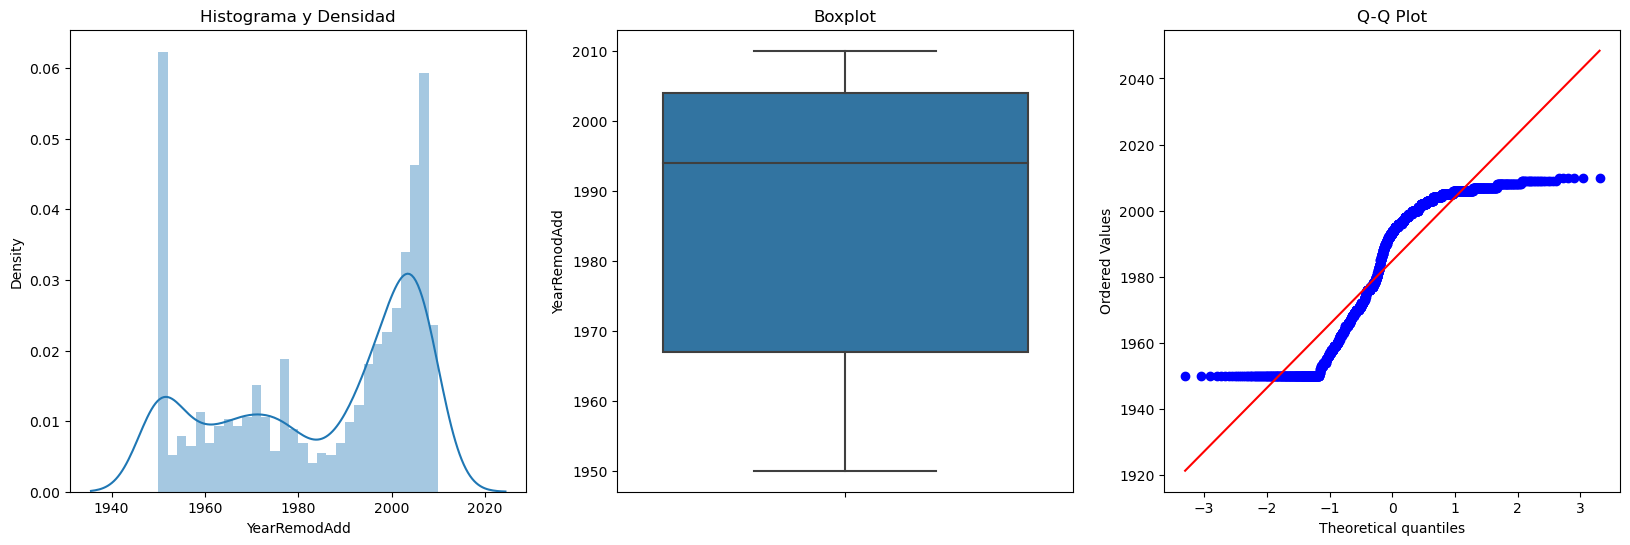

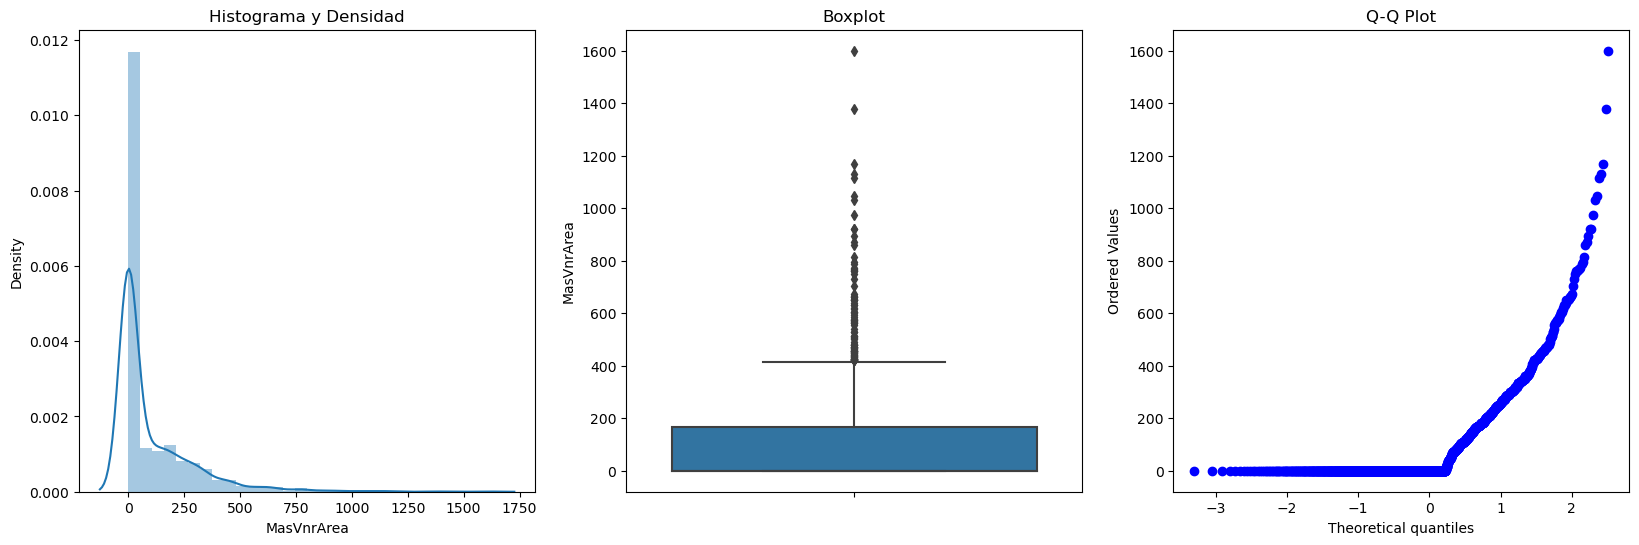

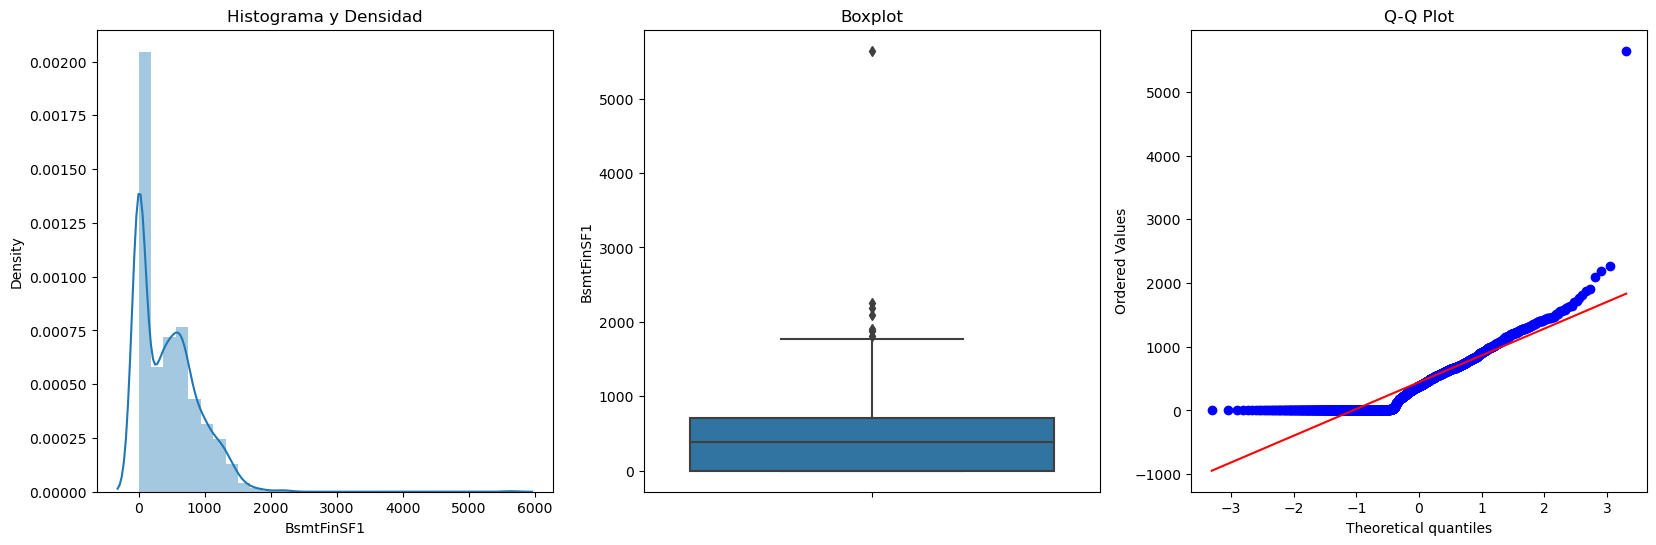

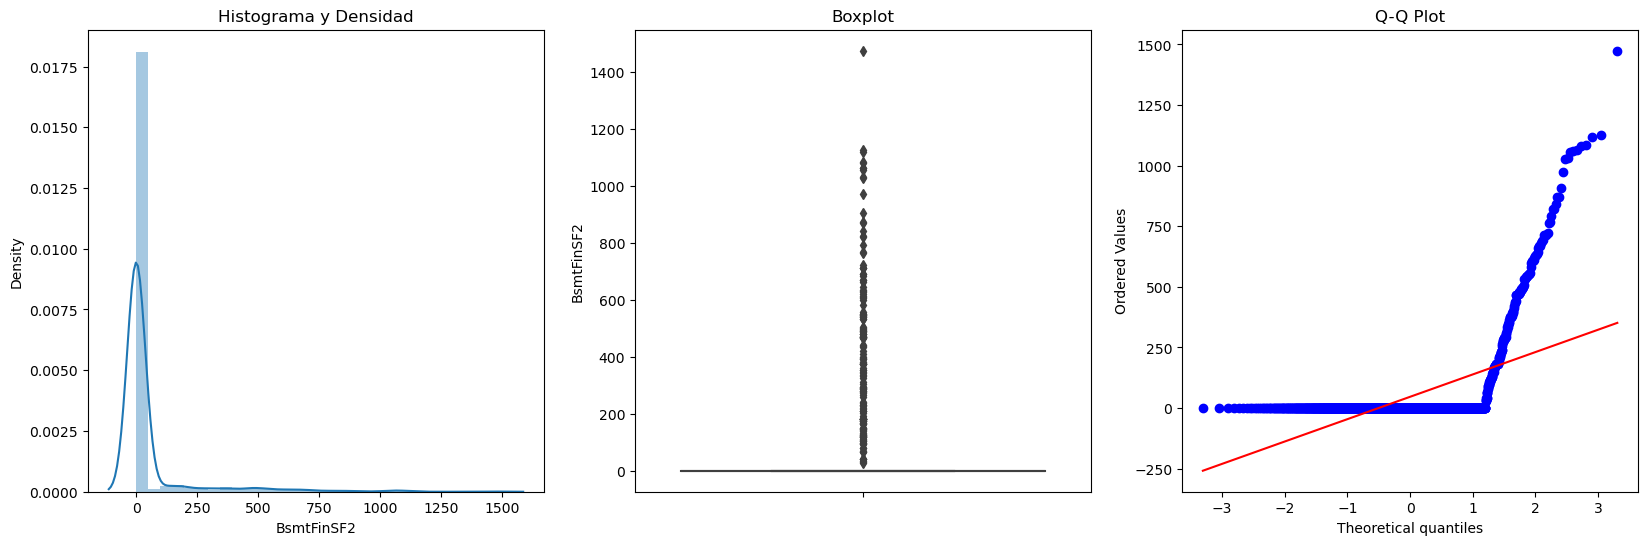

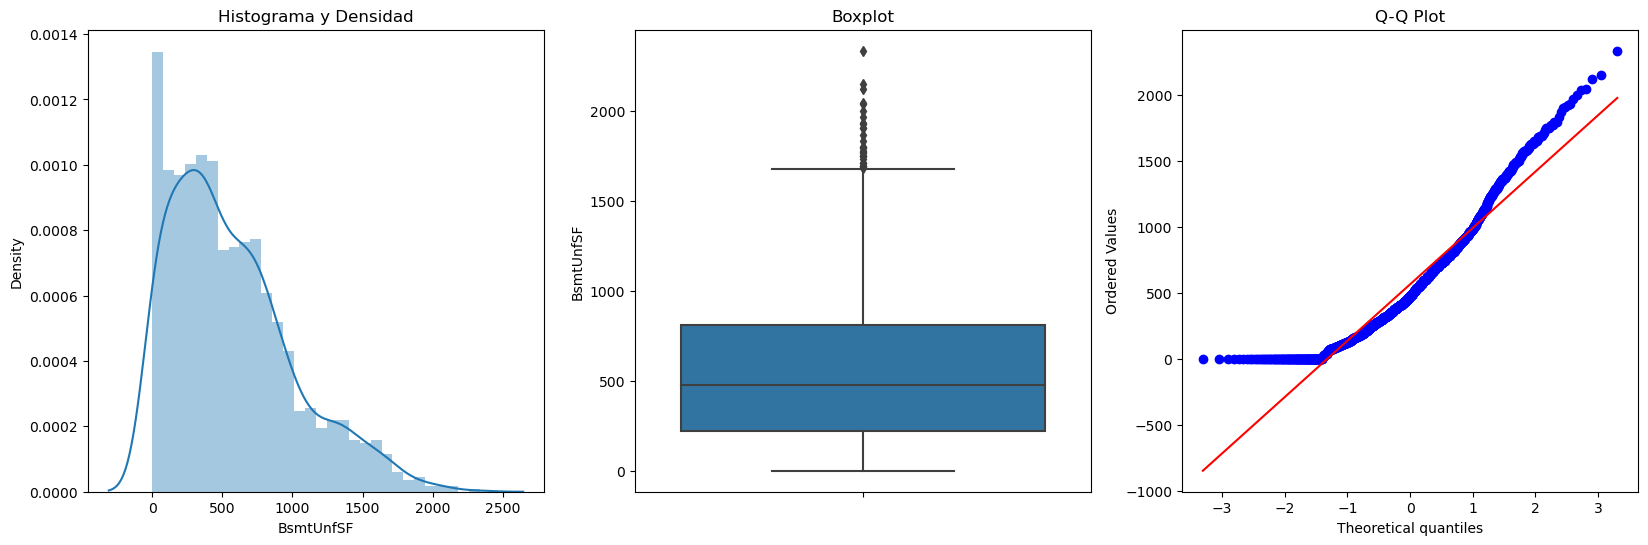

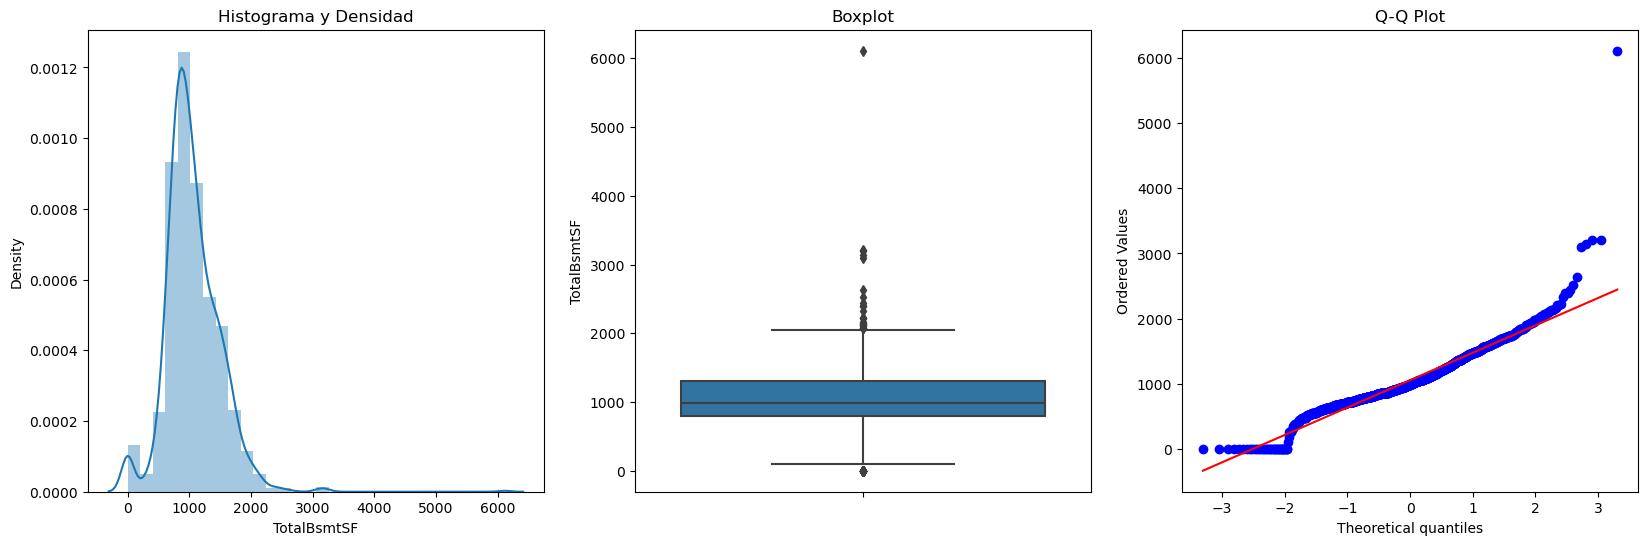

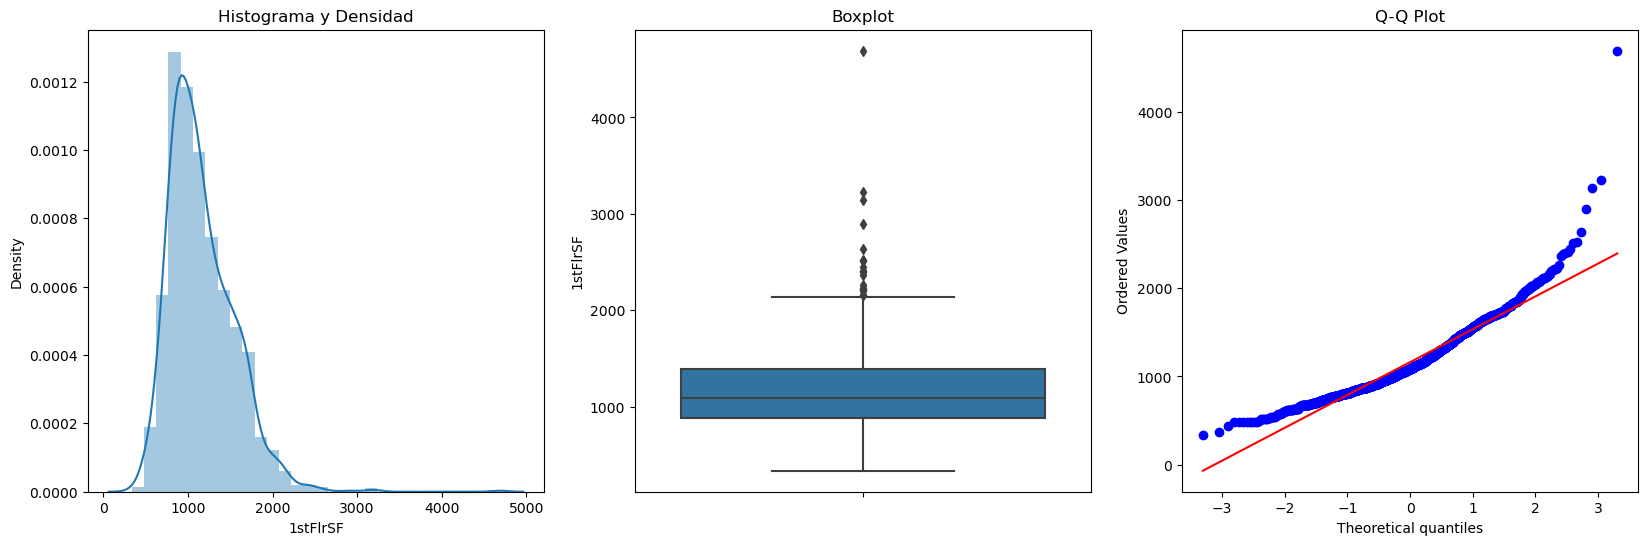

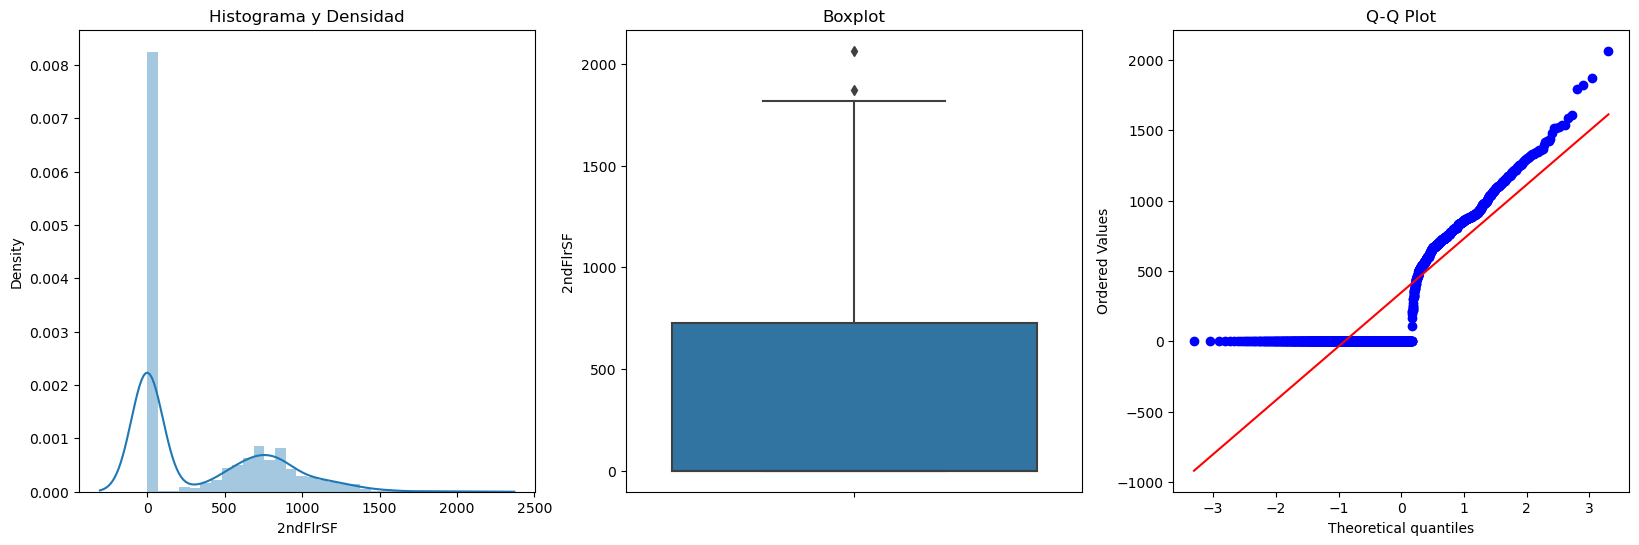

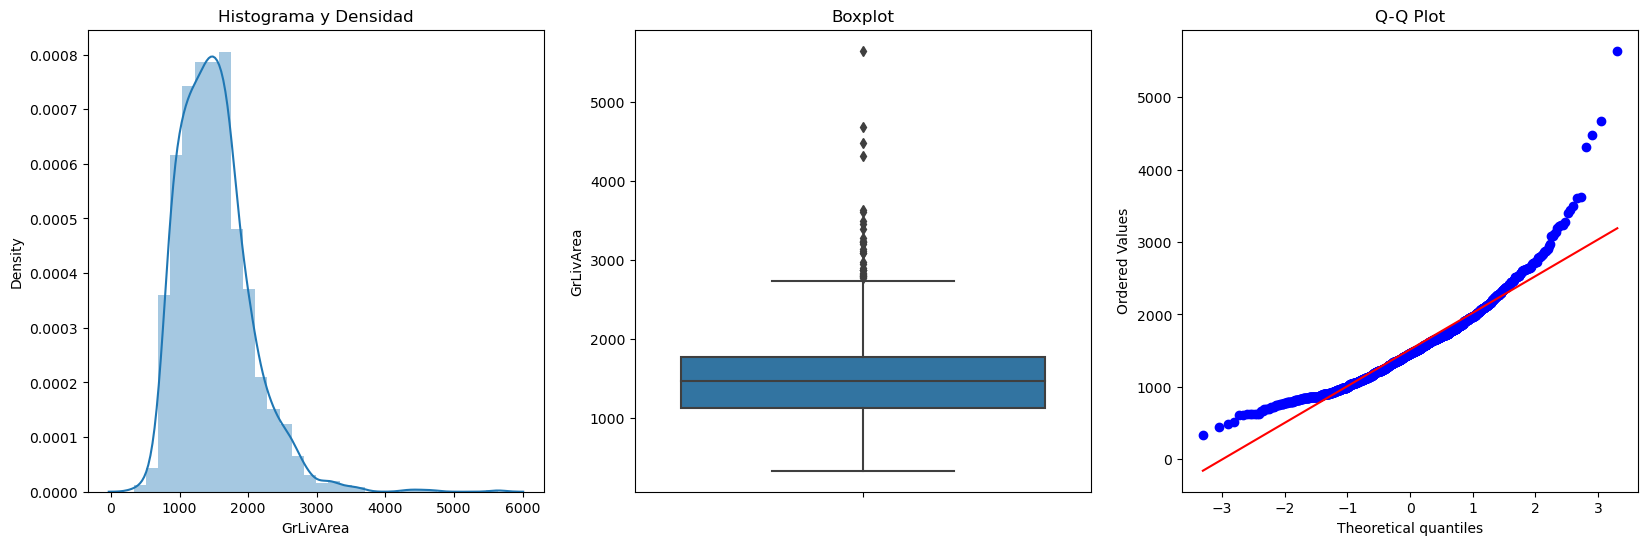

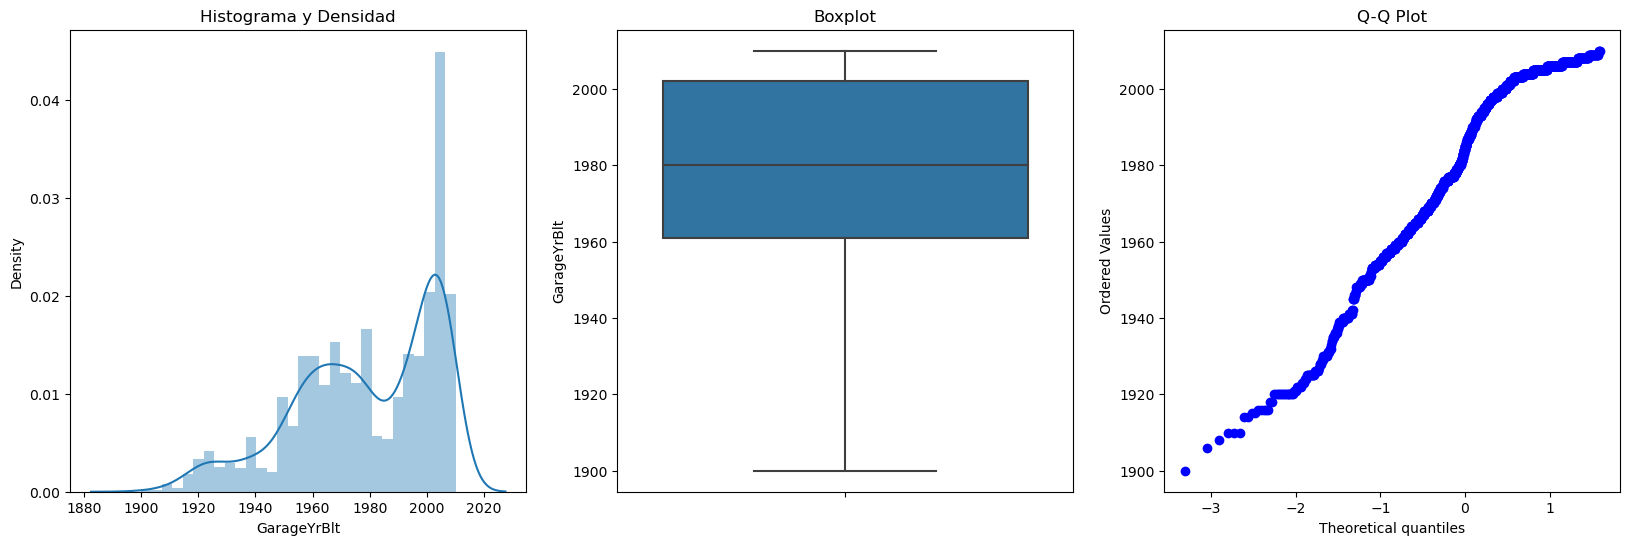

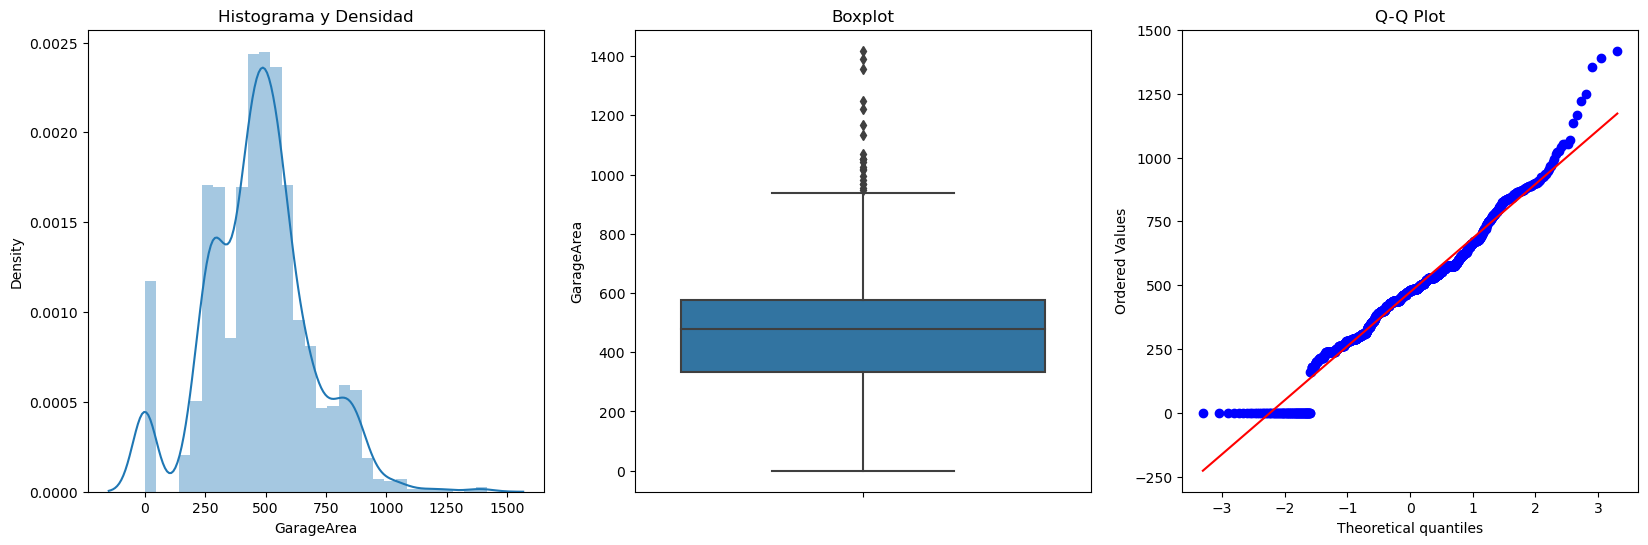

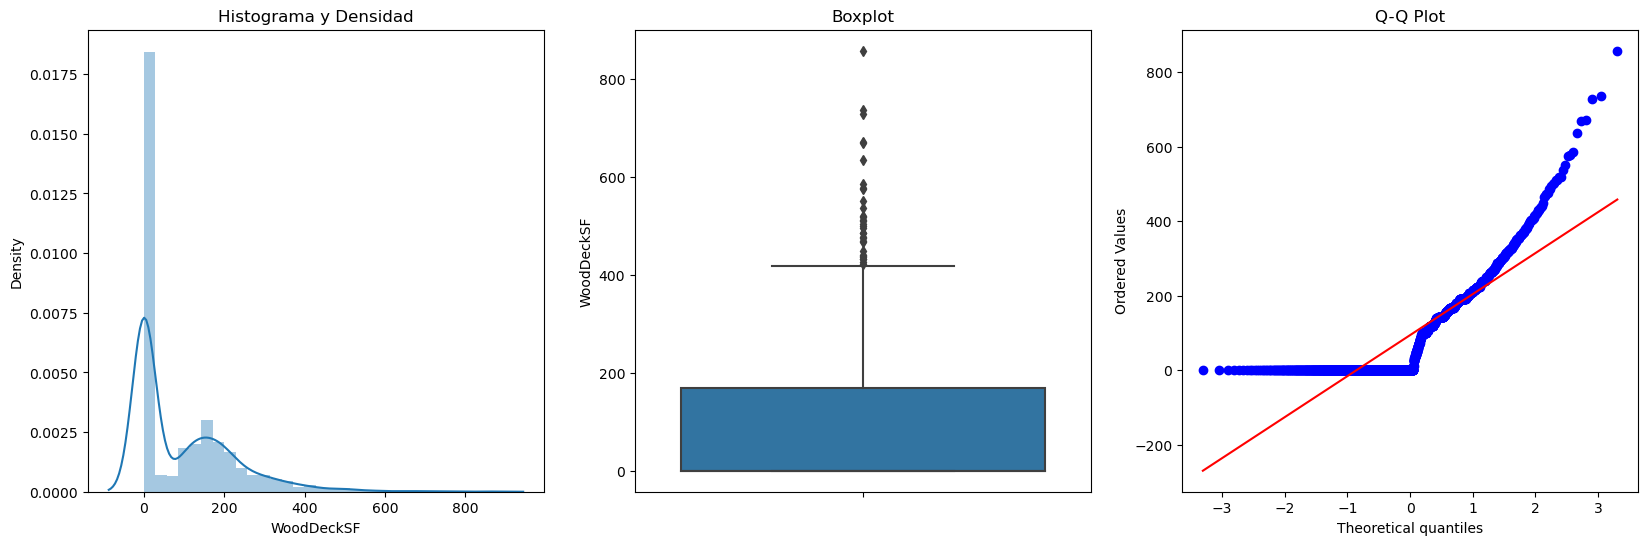

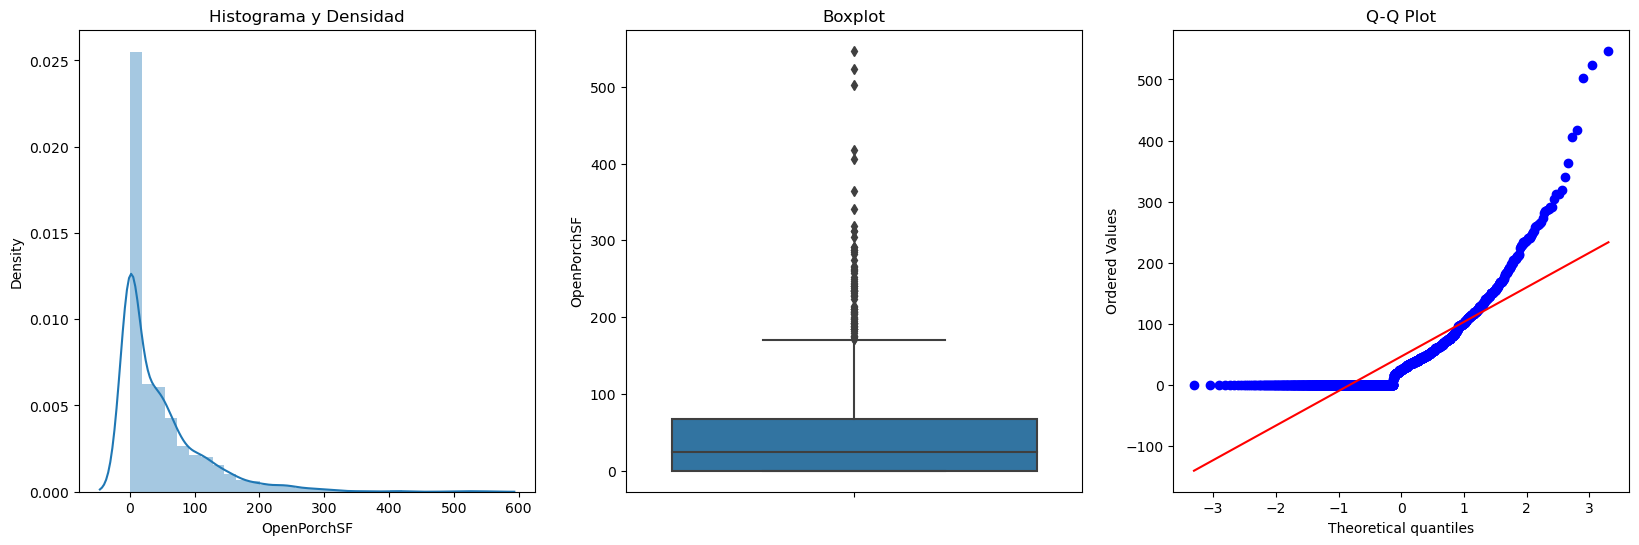

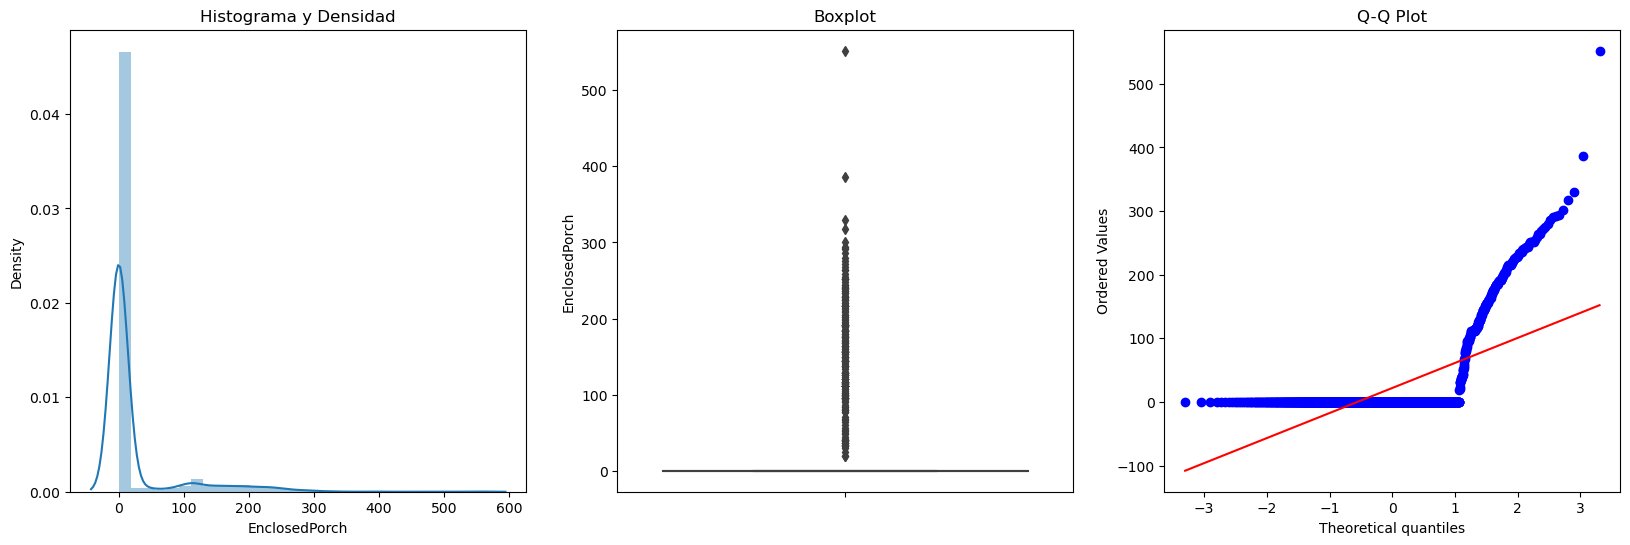

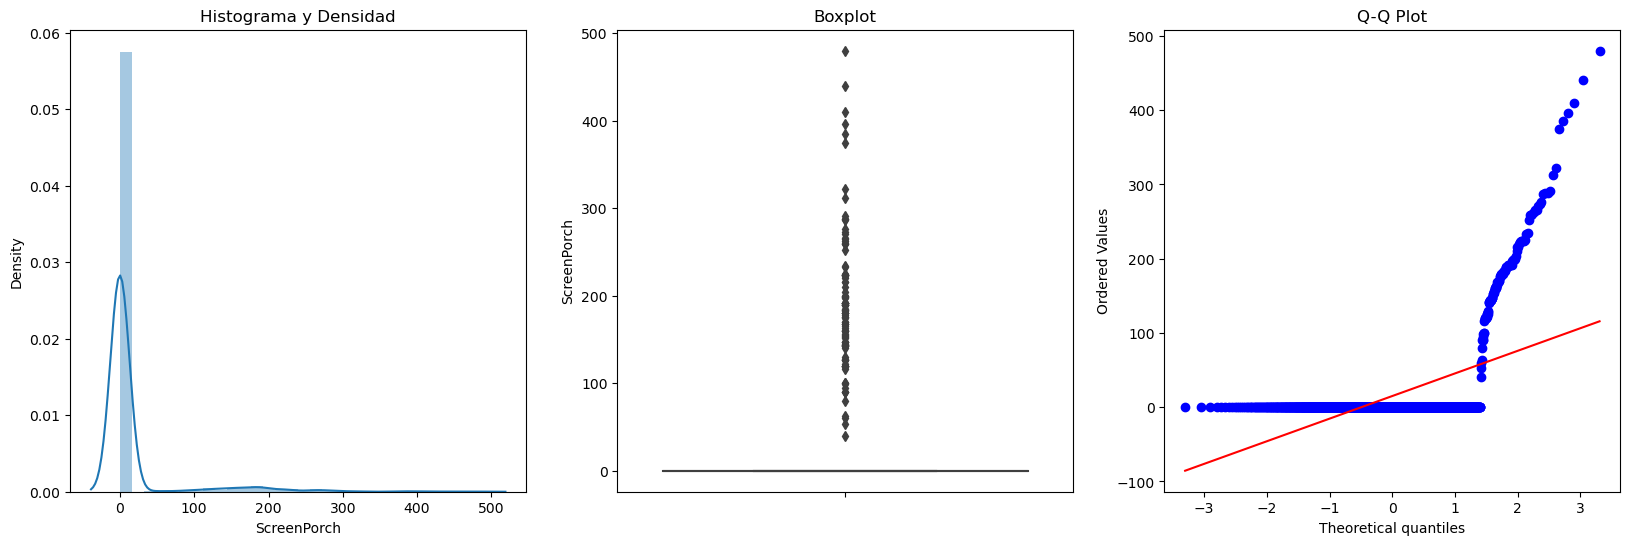

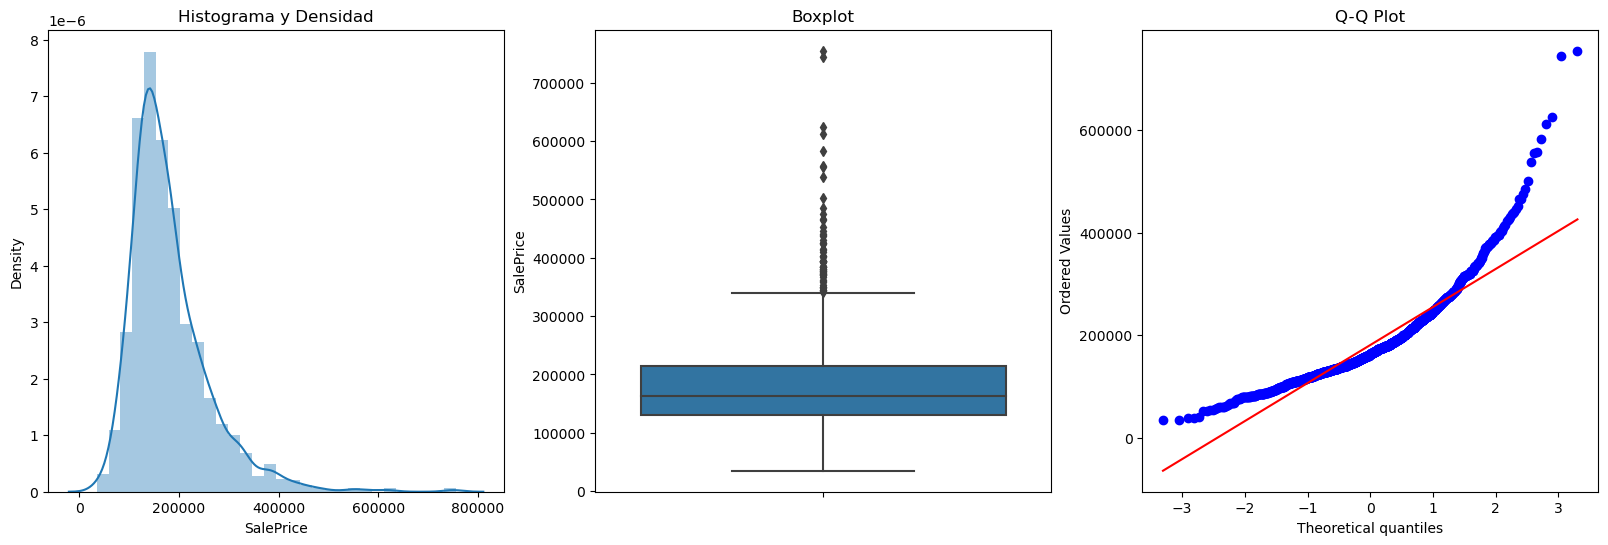

In [150]:
for col in continuas:
    plotDistBoxQQ(dataHP,col)
    

------------Id----------
------------LotFrontage----------
------------LotArea----------
------------YearBuilt----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

------------YearRemodAdd----------
------------MasVnrArea----------
------------BsmtFinSF1----------
------------BsmtFinSF2----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

------------BsmtUnfSF----------
------------TotalBsmtSF----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


------------1stFlrSF----------
------------2ndFlrSF----------
------------GrLivArea----------
------------GarageYrBlt----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

------------GarageArea----------
------------WoodDeckSF----------
------------OpenPorchSF----------
------------EnclosedPorch----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

------------ScreenPorch----------
------------SalePrice----------


C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


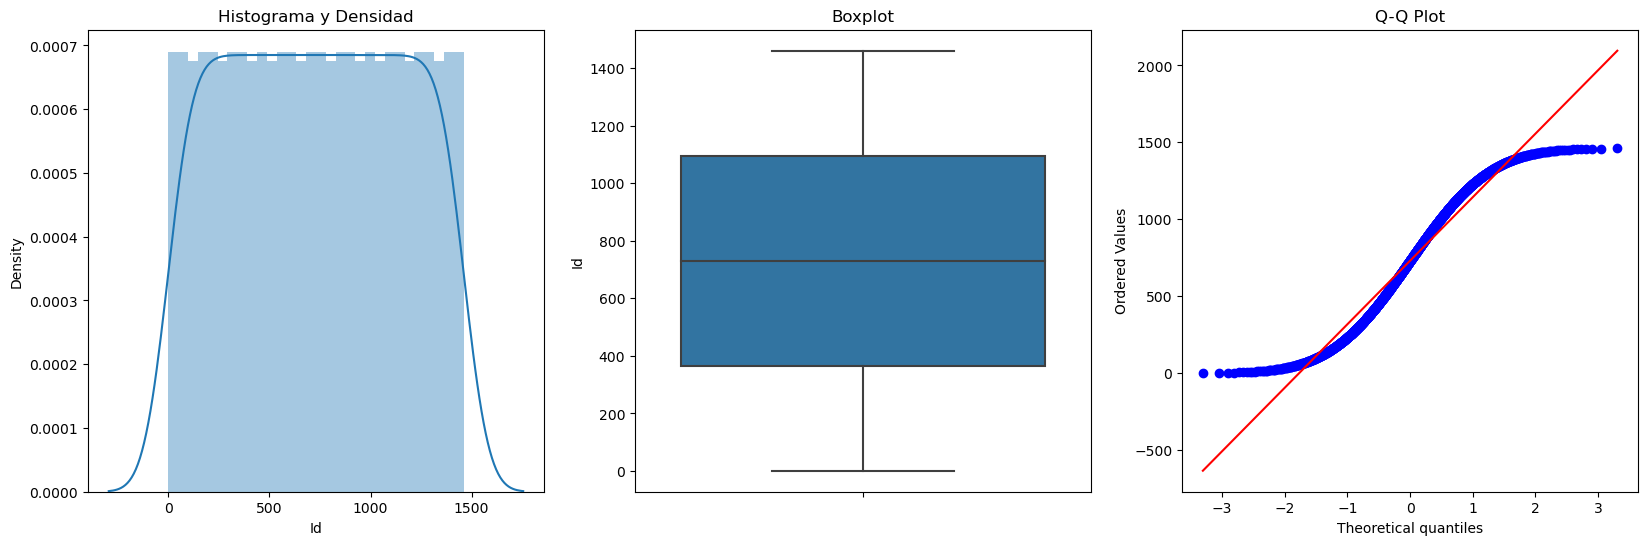

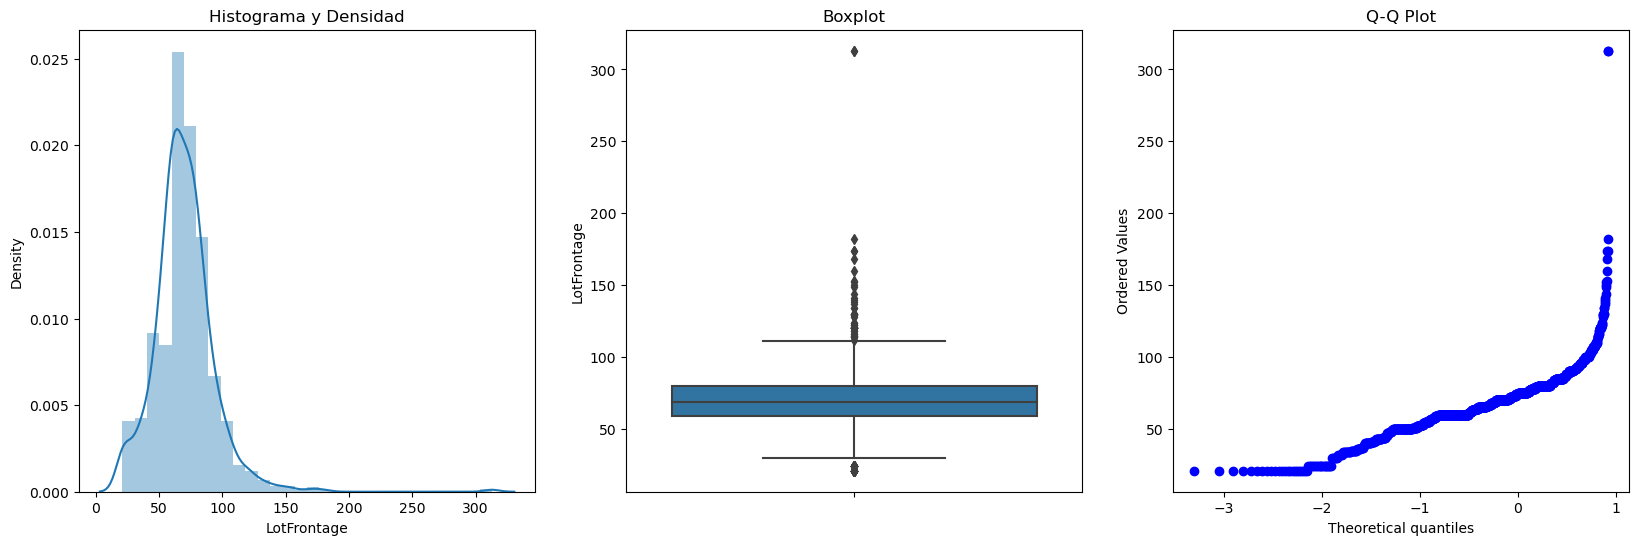

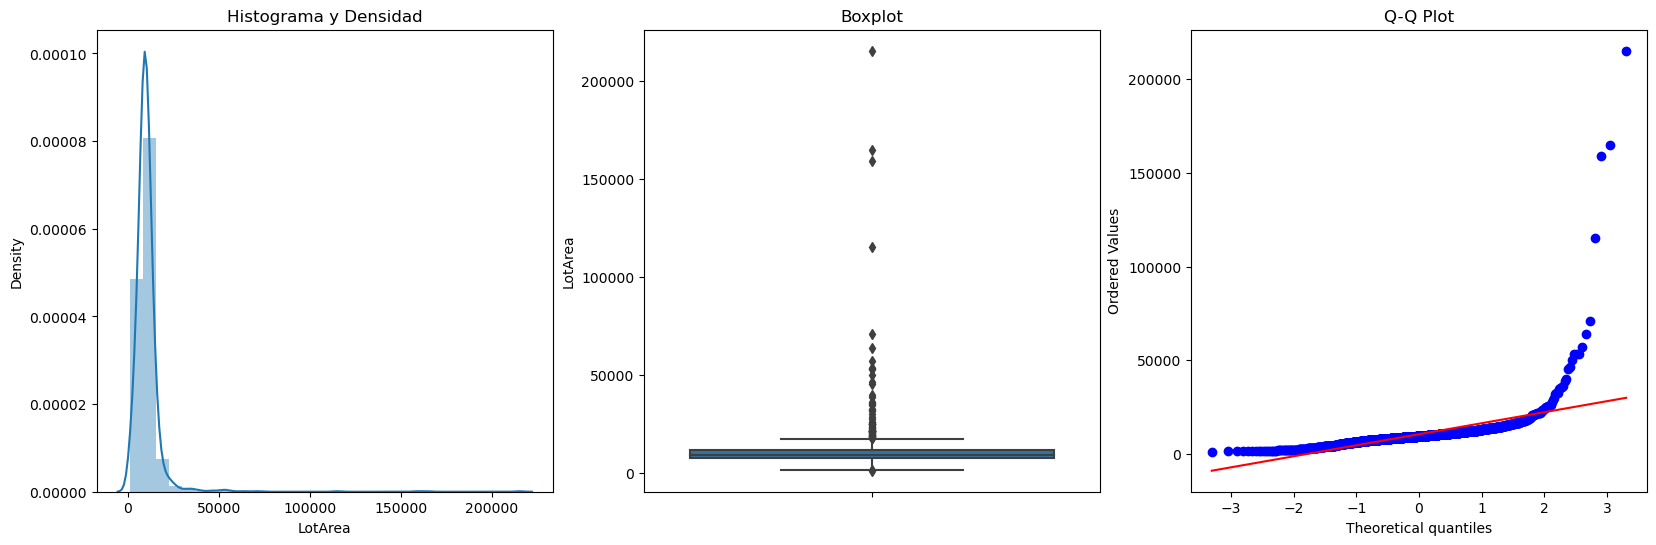

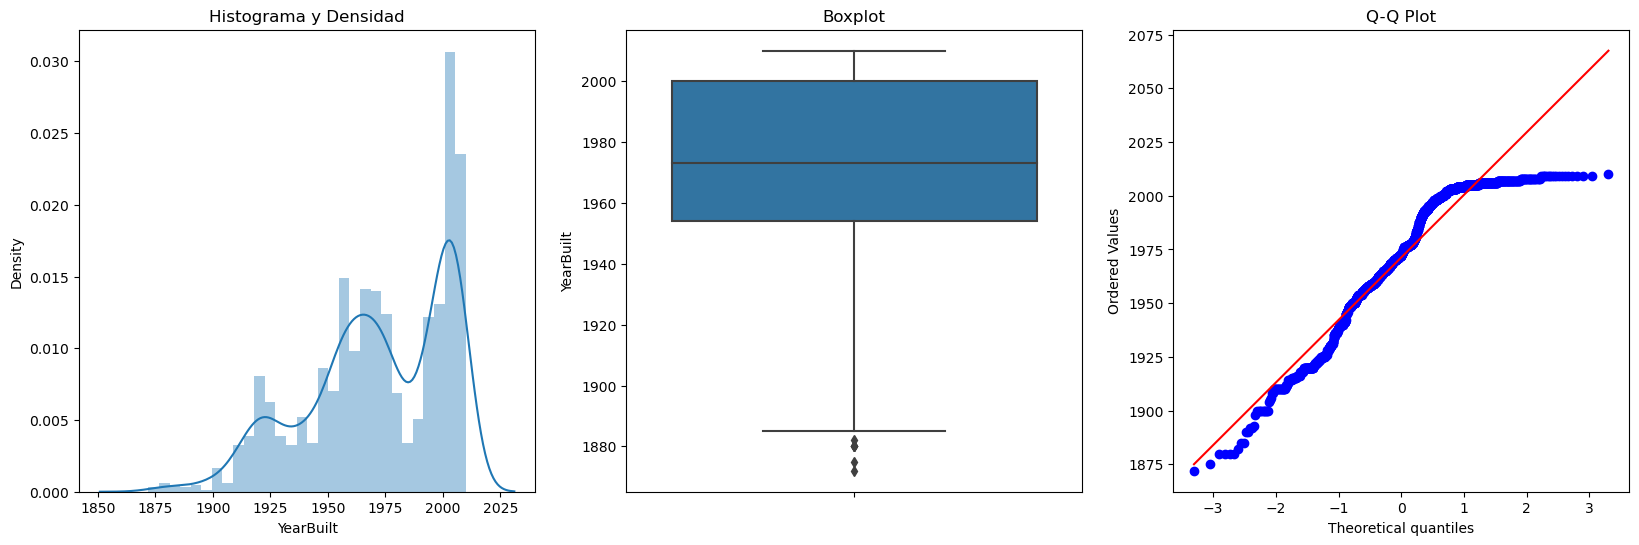

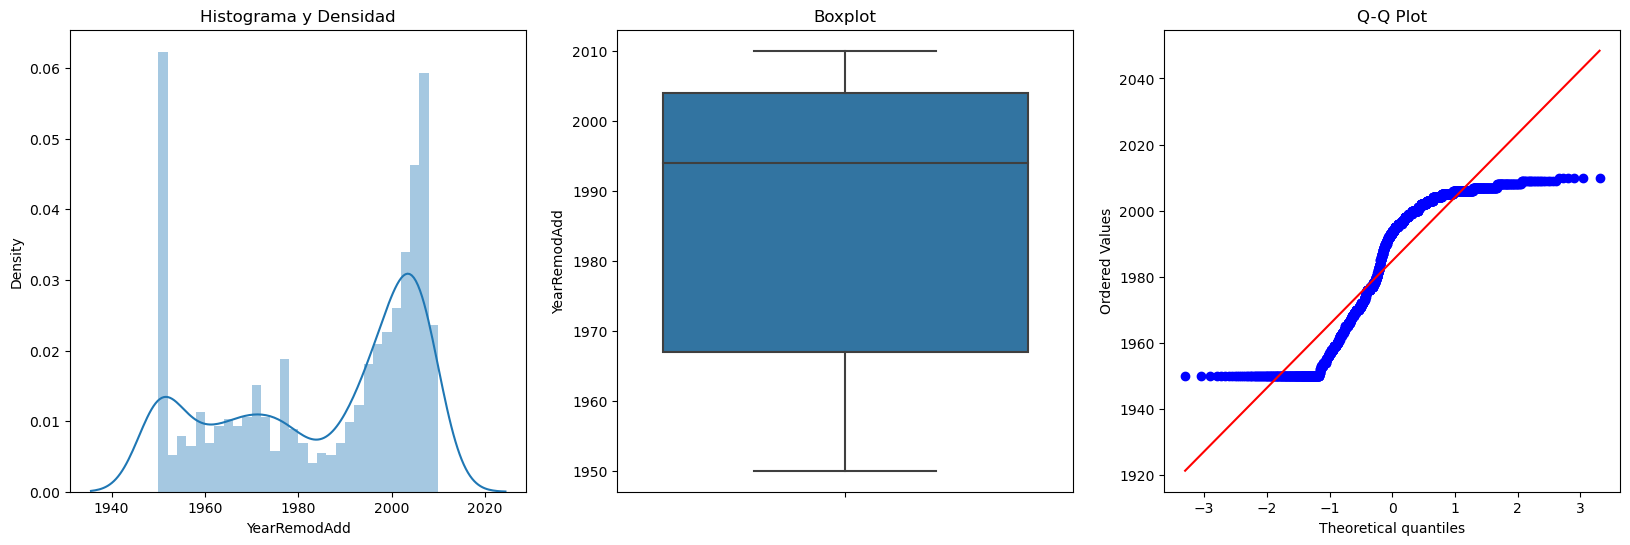

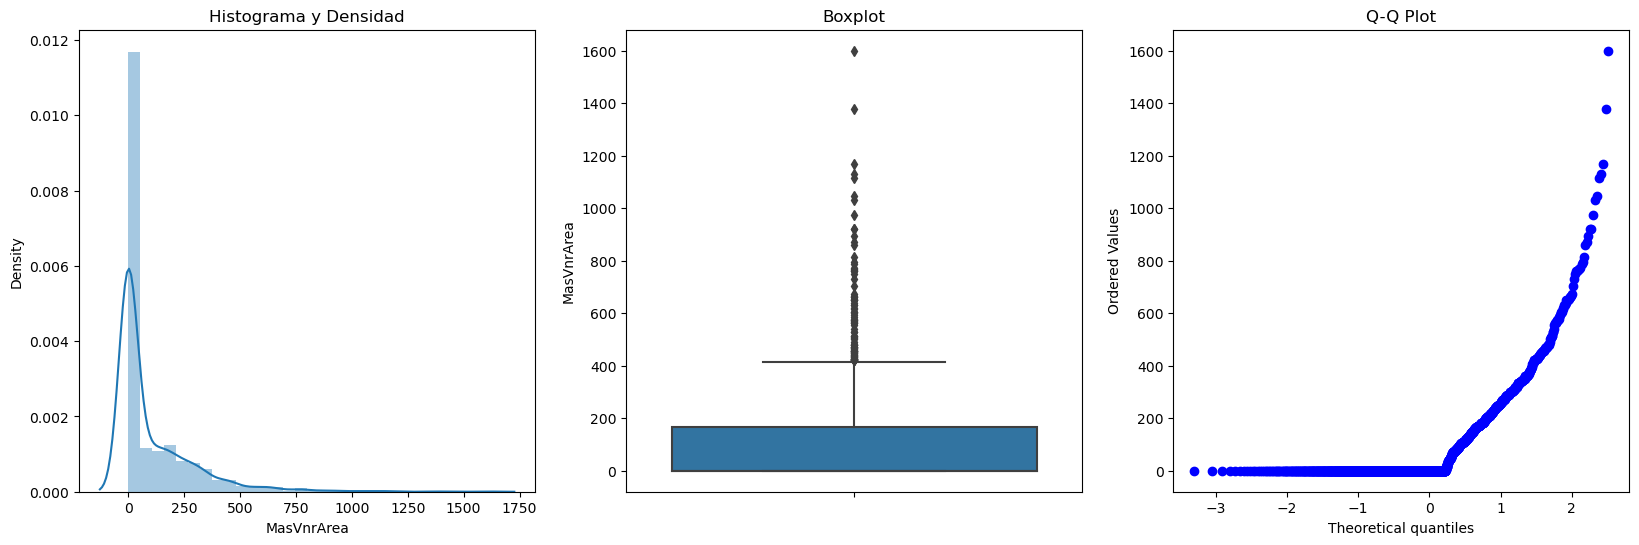

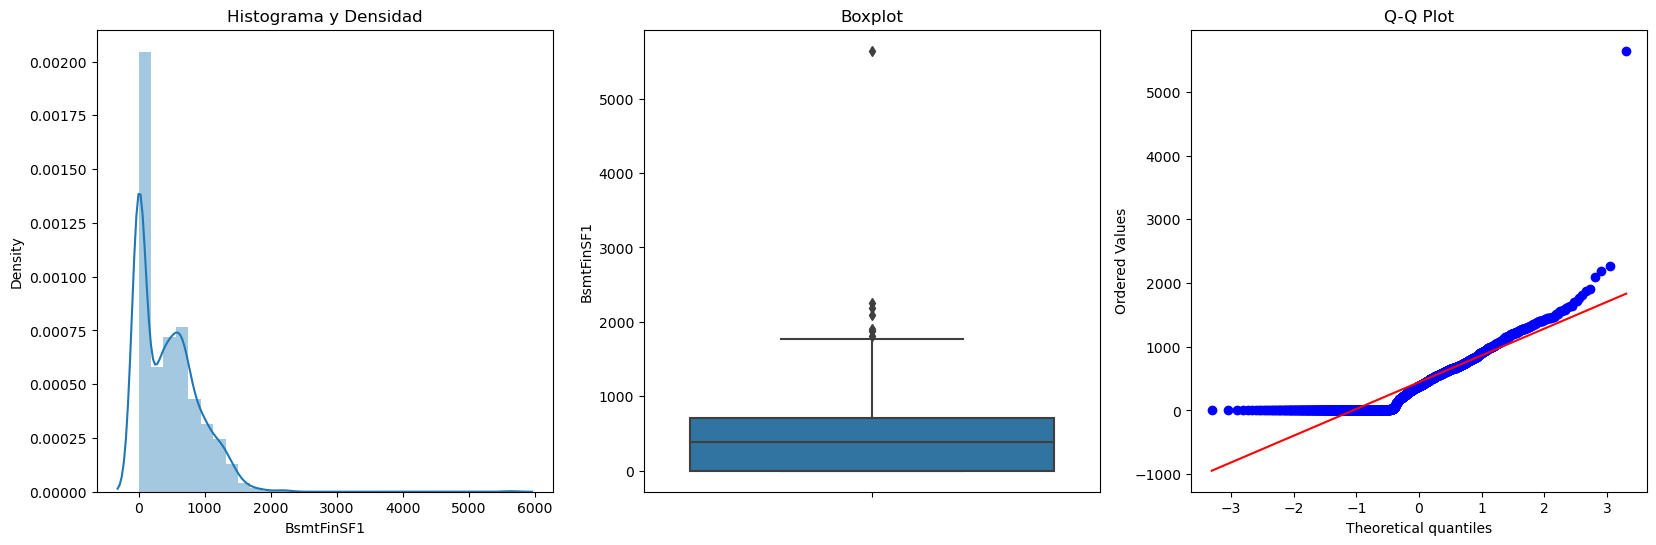

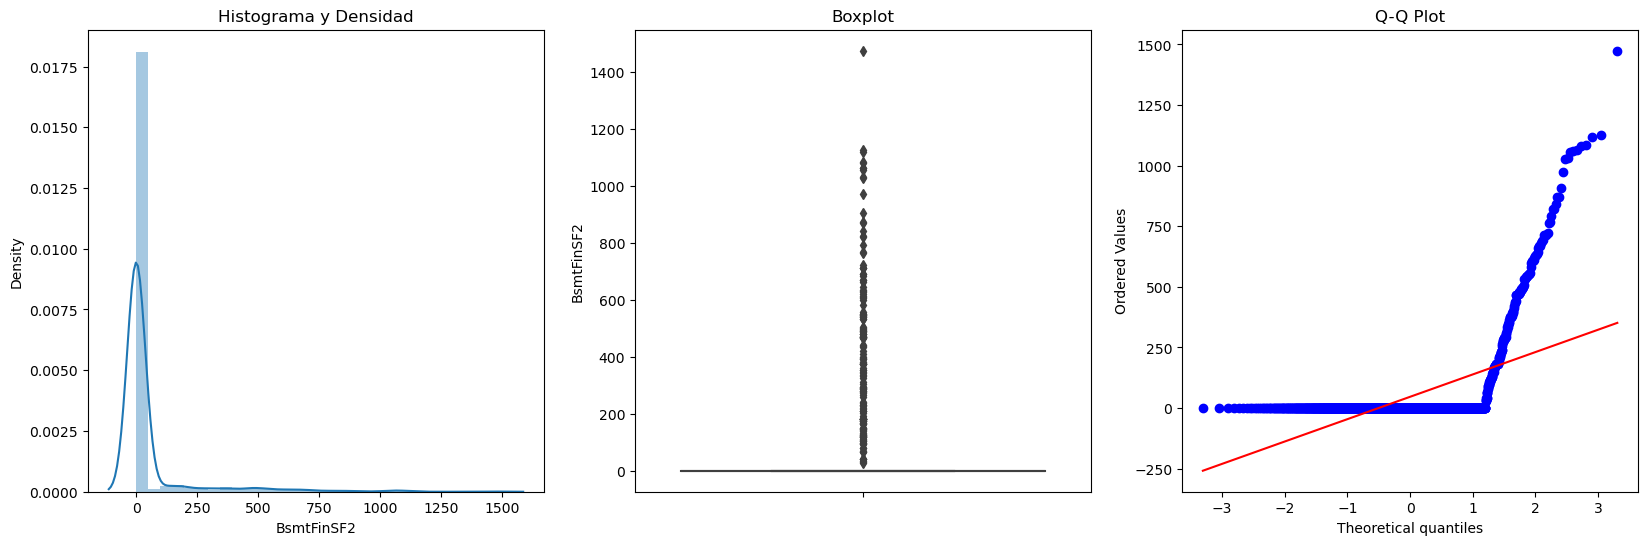

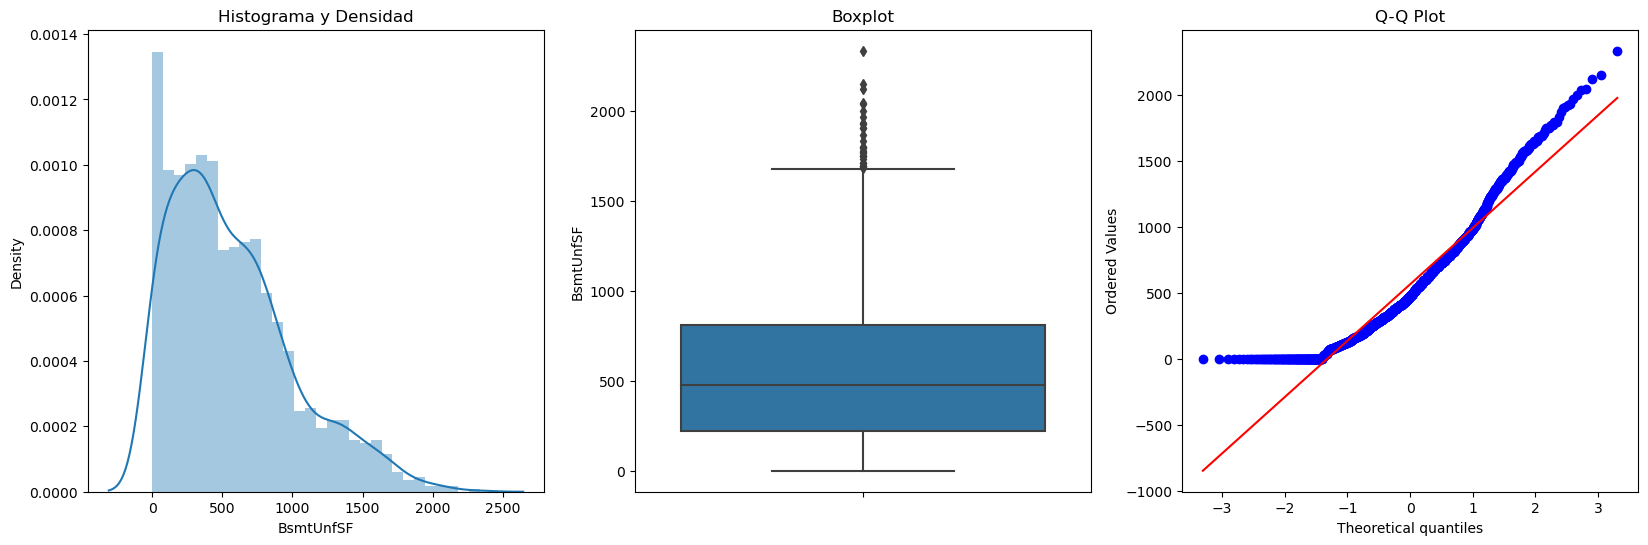

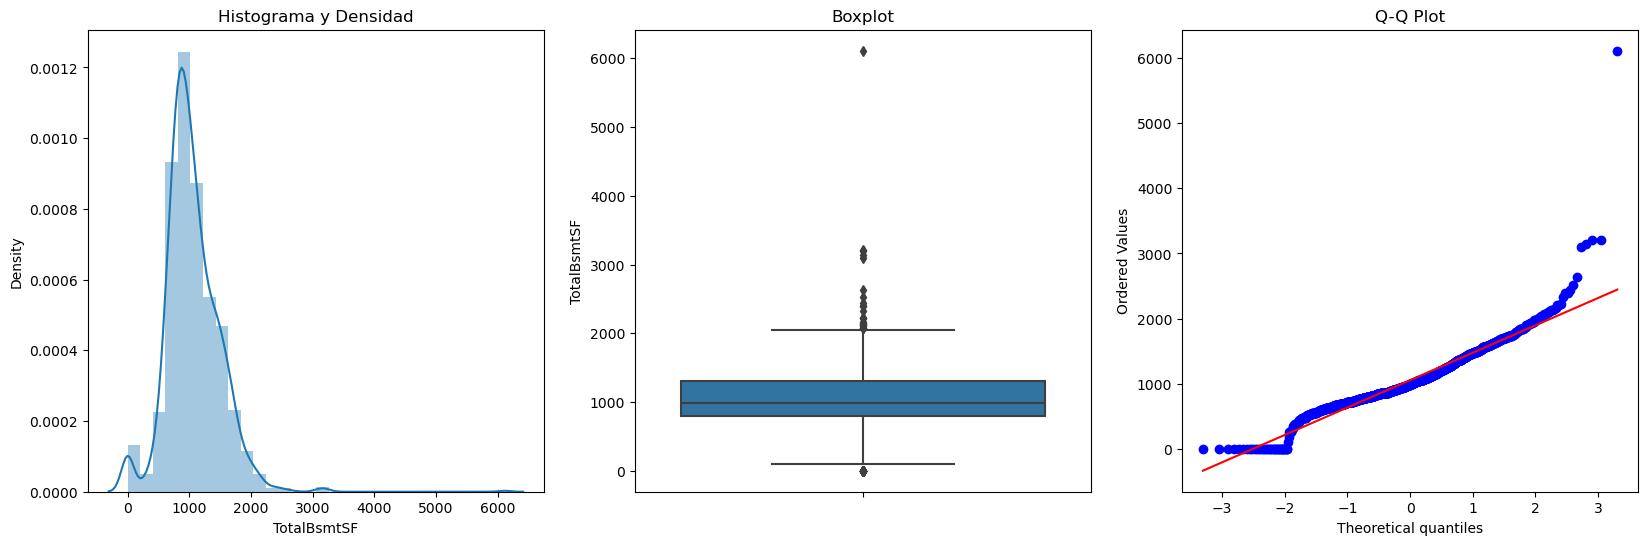

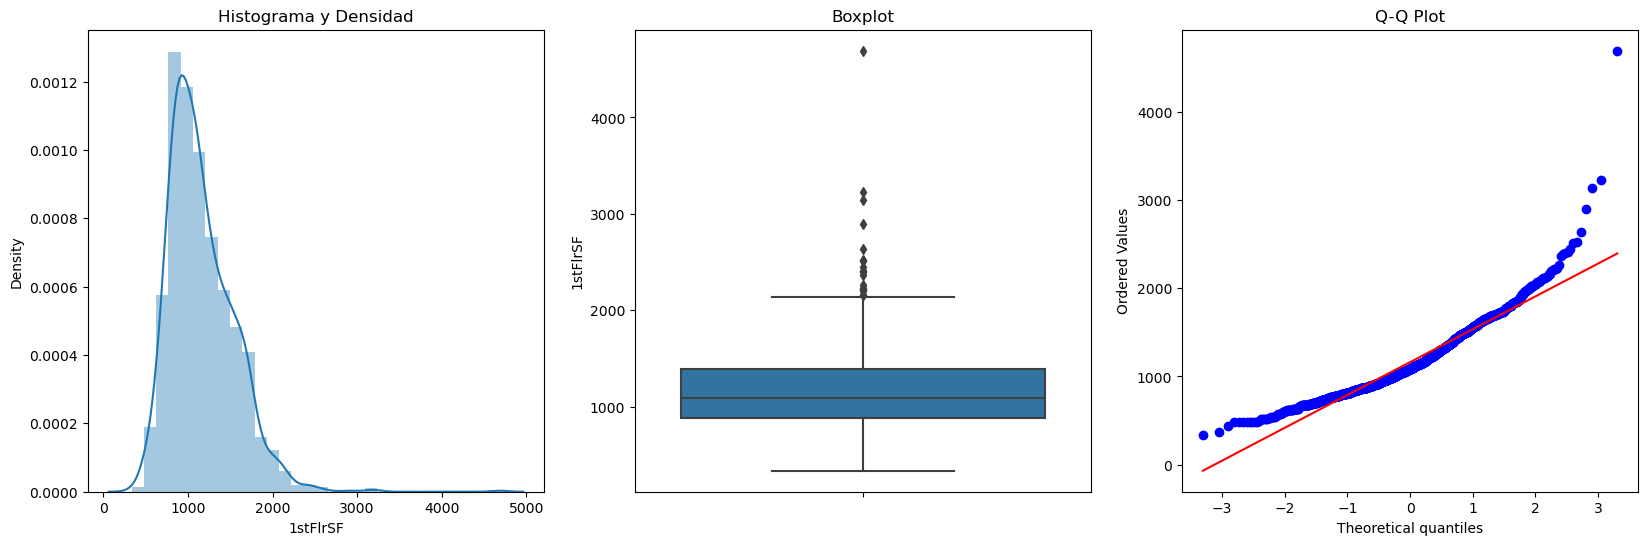

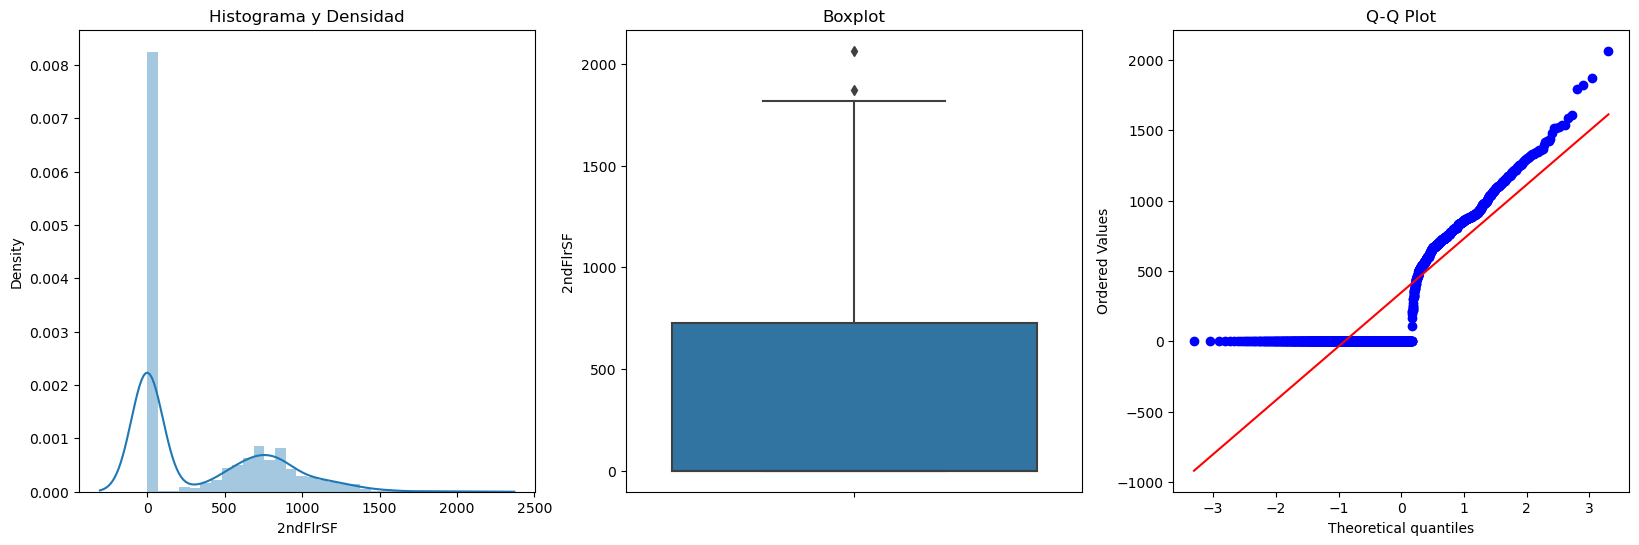

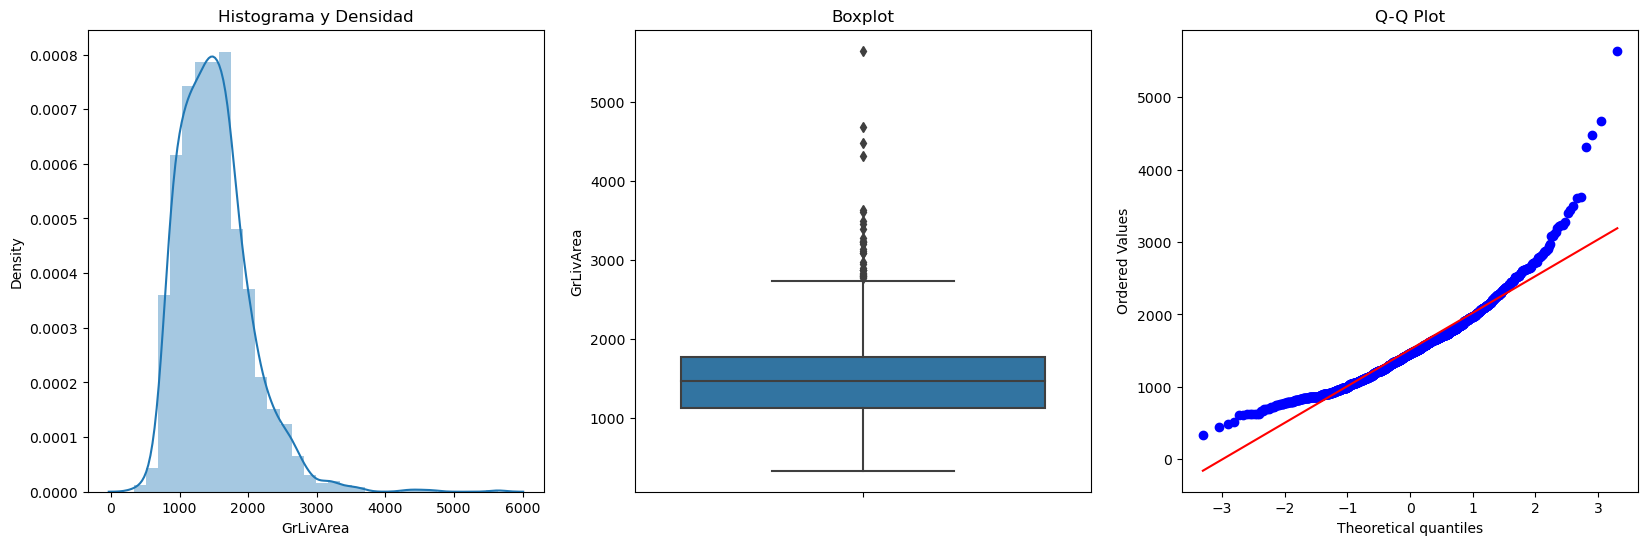

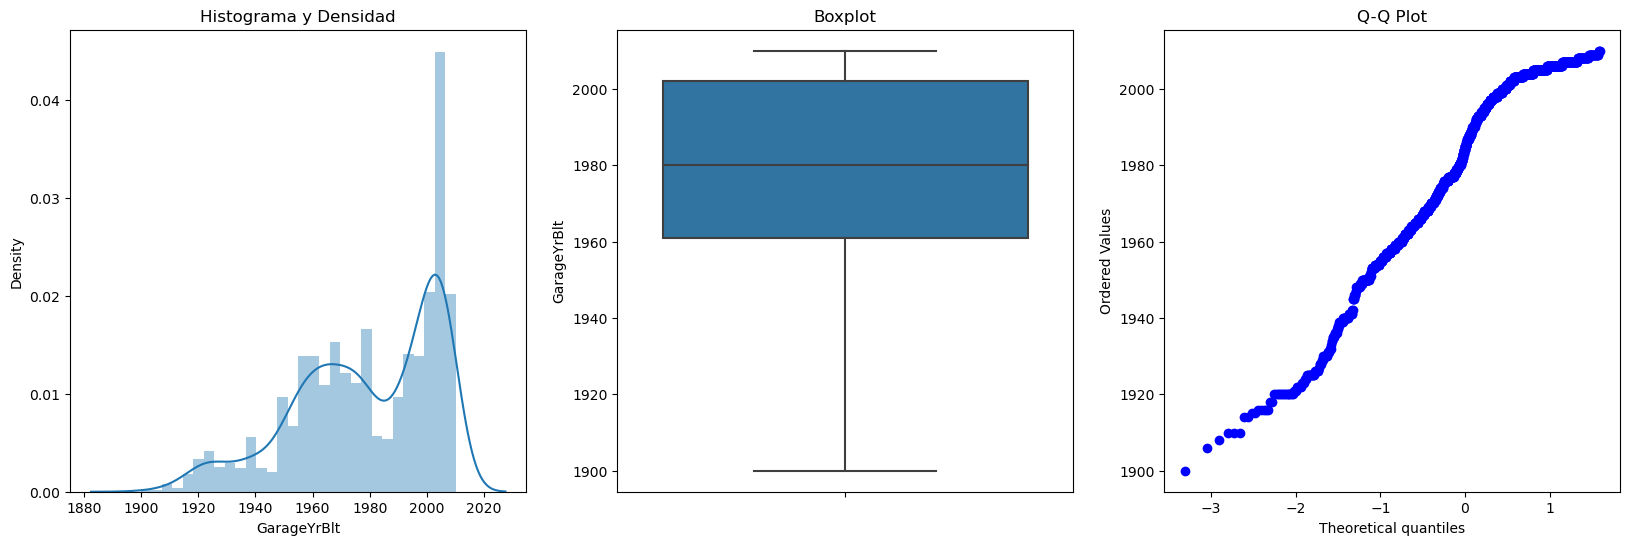

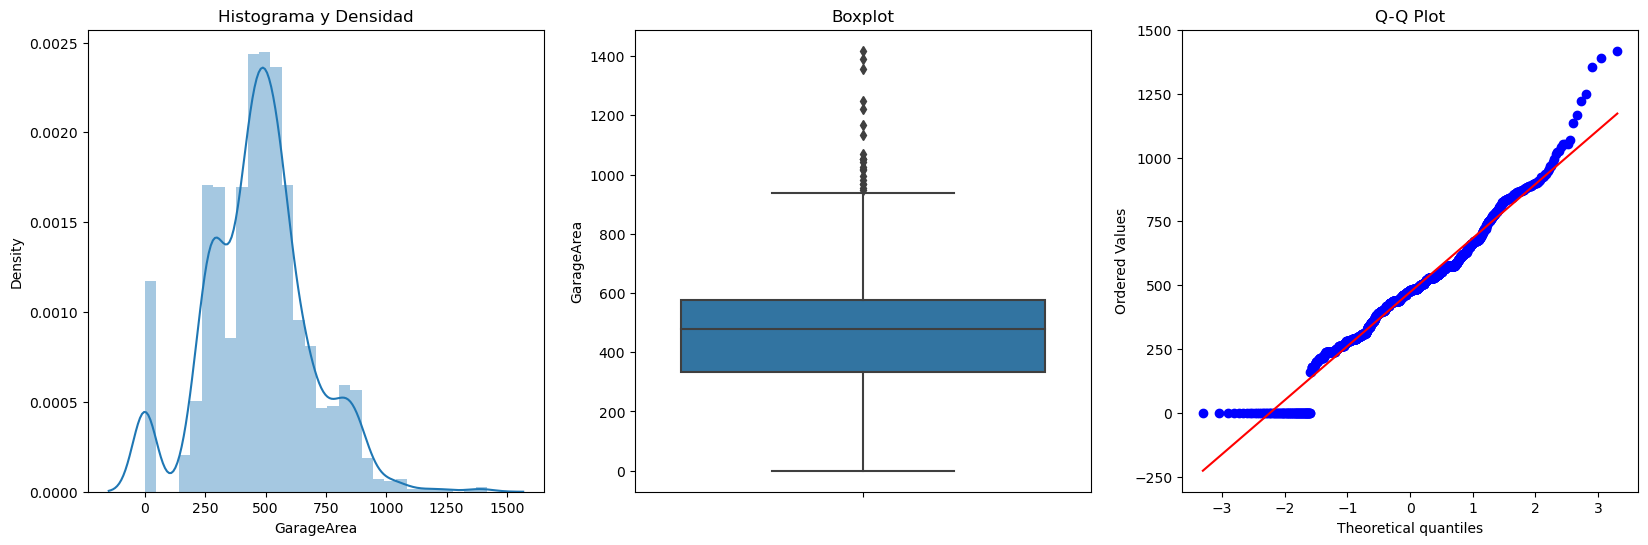

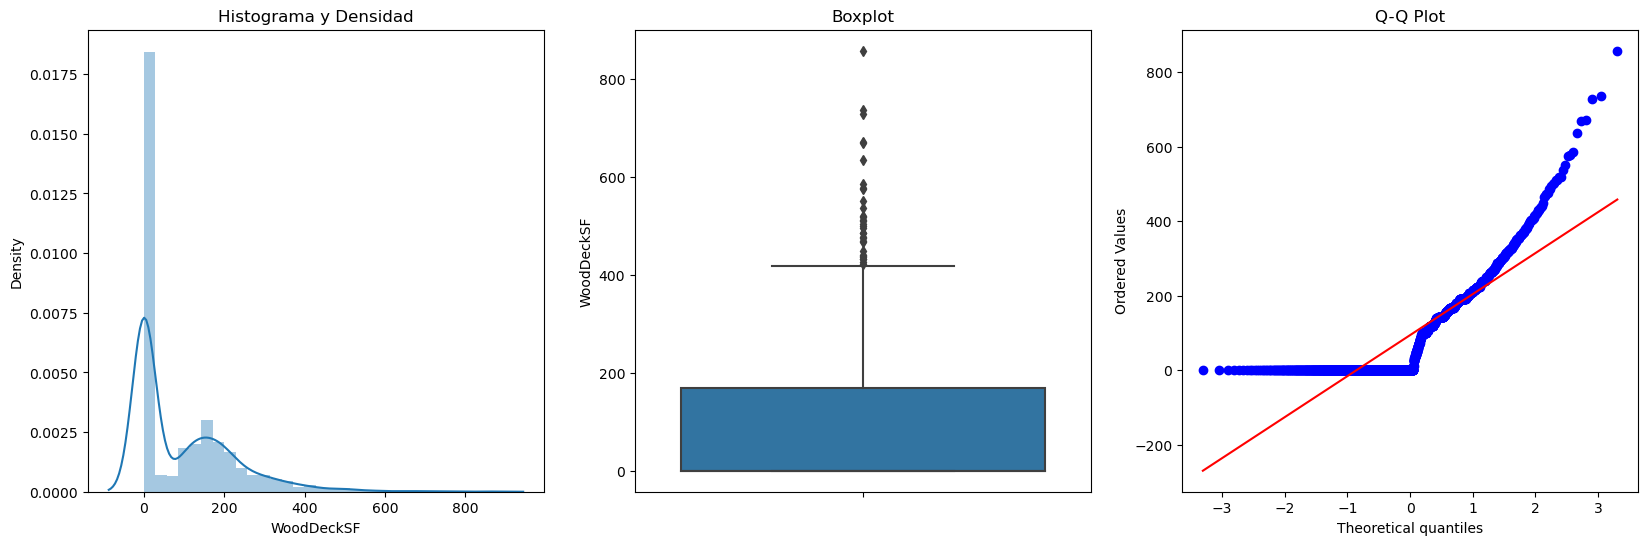

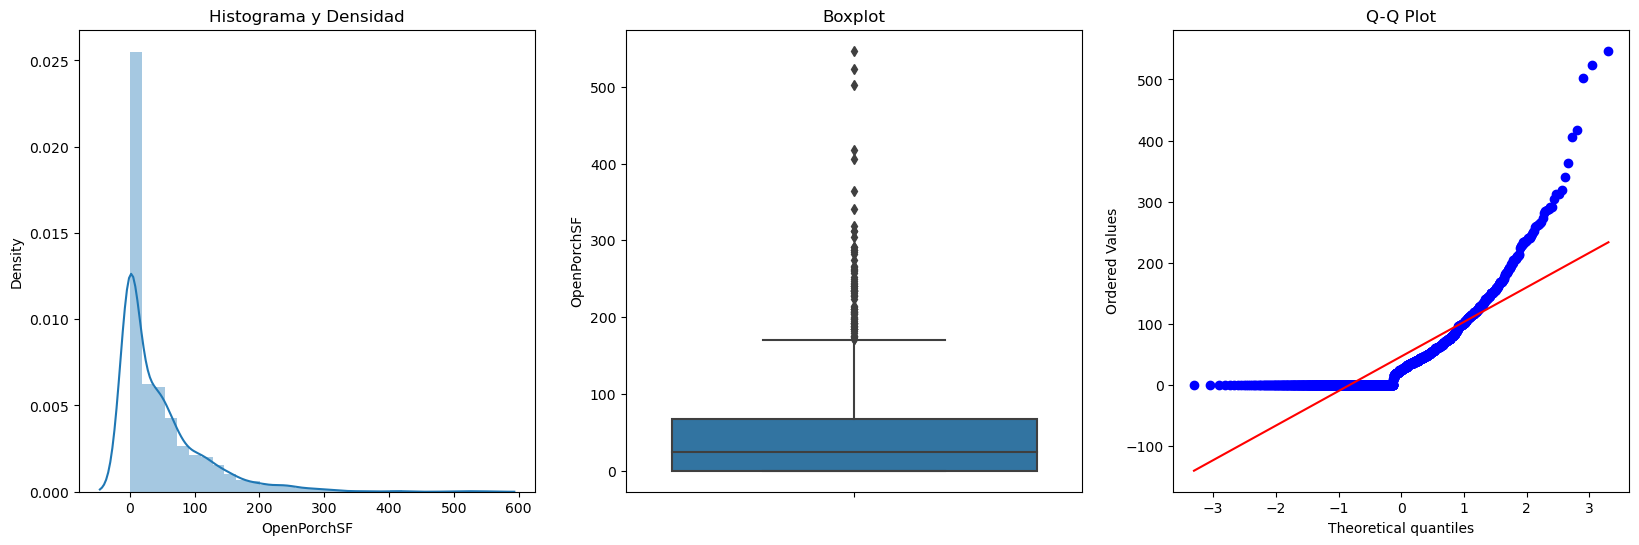

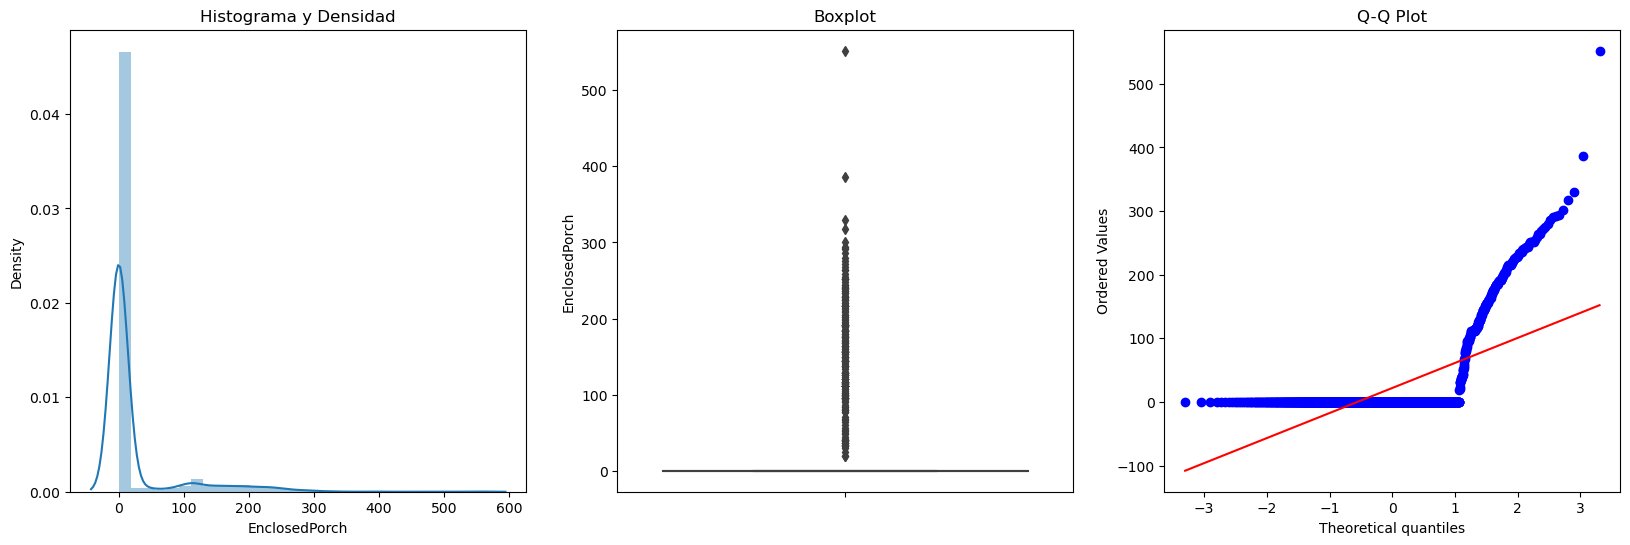

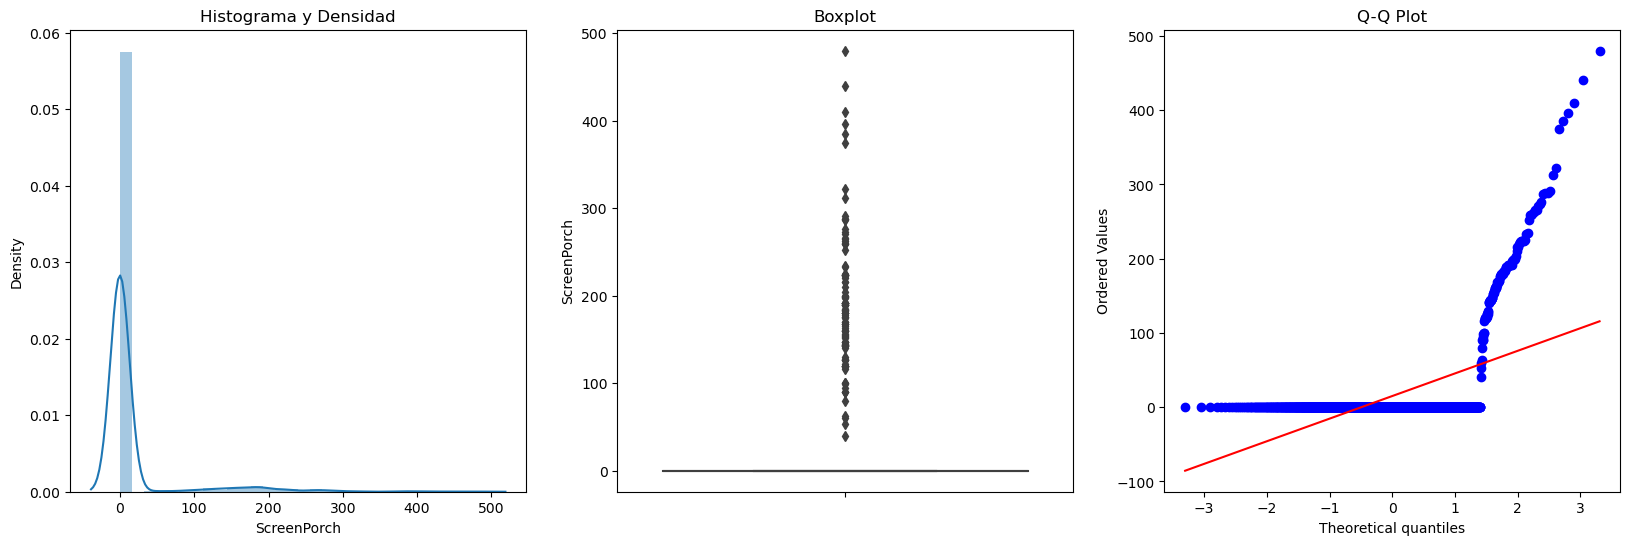

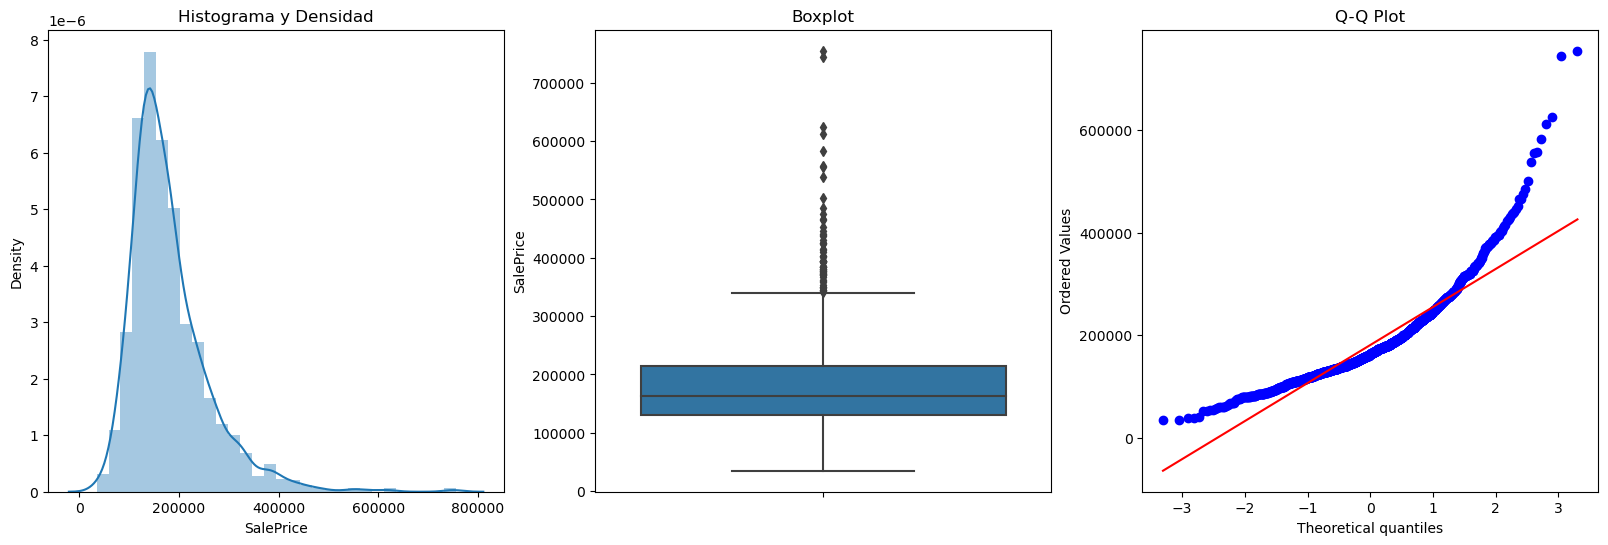

In [151]:
for col in continuas:
    print(f"------------{col}----------")
    plotDistBoxQQ(dataHP,col)
    

In [153]:
dataset= dataHP
col= 'LotArea'


IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

469.5
18685.5


In [160]:
###descripción: Calcula los limites superiores e inferiores para detección de outliers. Input:dataset->pandas dataframe, col ->string nombre de columna Output: tuplade floats con los limites superiores e inferiores


In [169]:
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS


In [170]:
LI, LS= detectOutliersLimits(dataHP,'SalePrice')
LI, LS

(-17068.75, 361043.75)

In [173]:
### Capping

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


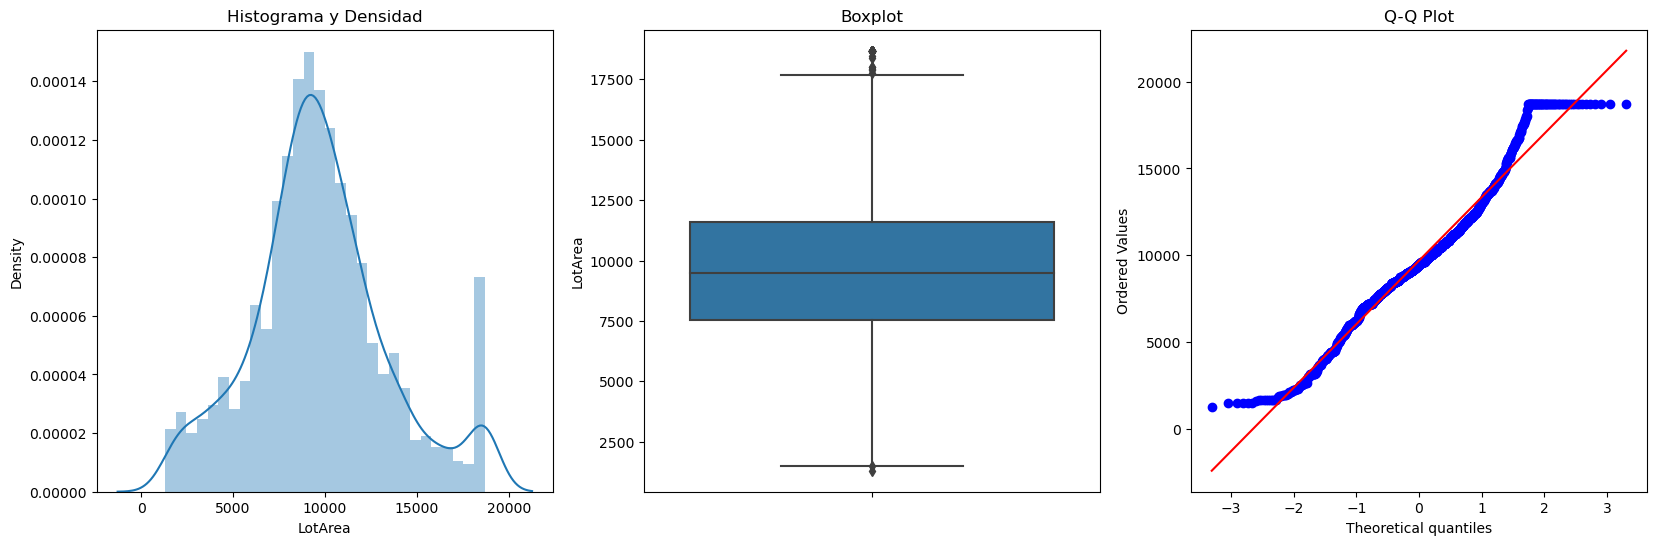

In [174]:
plotDistBoxQQ(dataHP,'LotArea')

In [175]:
LI, LS= detectOutliersLimits(dataHP,'LotArea')
dataHP['LotArea']=np.where(dataHP['LotArea']> LS,LS,
                          np.where(dataHP['LotArea']<LI, LI,dataHP['LotArea']))

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


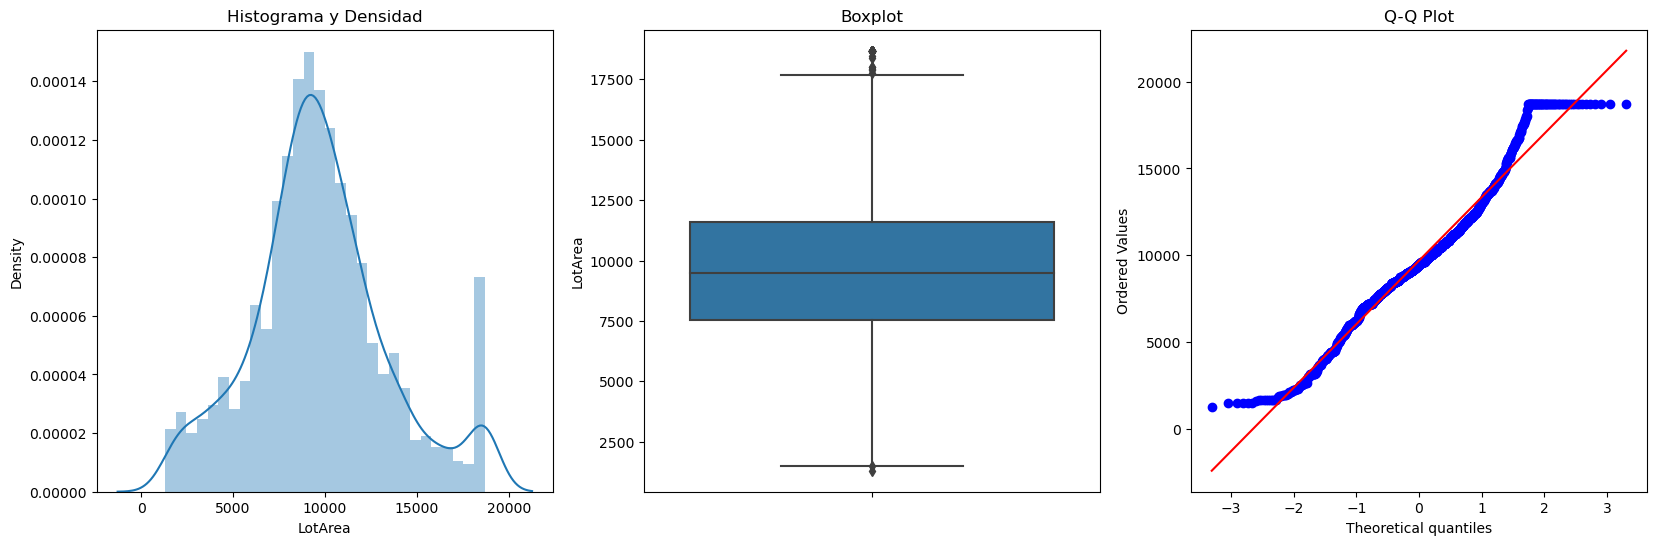

In [176]:
plotDistBoxQQ(dataHP,'LotArea')